# Final Project

We use a data set from the UCI Machine Learning Repository.
        https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
    
Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data­Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22­31, June 2014

### Bank Marketing Data Set 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### Data Set Information
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets: 
1. bank­additional­full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] 
2. bank­additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs. 
3. bank­full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:

Input variables:
- *bank client data:*
        1 age (numeric)
        2 job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
        3 marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
        4 education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
        5 default: has credit in default? (categorical: 'no','yes','unknown')
        6 housing: has housing loan? (categorical: 'no','yes','unknown')
        7 loan: has personal loan? (categorical: 'no','yes','unknown')
- *related with the last contact of the current campaign:*
        8 contact: contact communication type (categorical: 'cellular','telephone') 
        9 month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
        10 day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
        11 duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- *other attributes:*
        12 campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
        13 pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
        14 previous: number of contacts performed before this campaign and for this client (numeric)
        15 poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- *social and economic context attributes*
        16 emp.var.rate: employment variation rate - quarterly indicator (numeric)
        17 cons.price.idx: consumer price index - monthly indicator (numeric) 
        18 cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
        19 euribor3m: euribor 3 month rate - daily indicator (numeric)
        20 nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
    21 y - has the client subscribed a term deposit? (binary: 'yes','no')


##  Step 1: Investigate Data

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing, cross_validation, neighbors,linear_model, tree
from sklearn.cluster import MeanShift, KMeans 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from matplotlib import style
style.use('ggplot')

/Users/xunzha/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('/Users/xunzha/Downloads/Peter_Project/bankfull.csv')
# convert yes to 1, no to 0
df.y.replace({'no':0, 'yes':1}, inplace=True)

In [3]:
all_features = set(df.columns)-set(['y'])
num_features = set(df.describe().columns)-set(['y'])
cat_features = all_features-num_features

Explore the numeric attributes

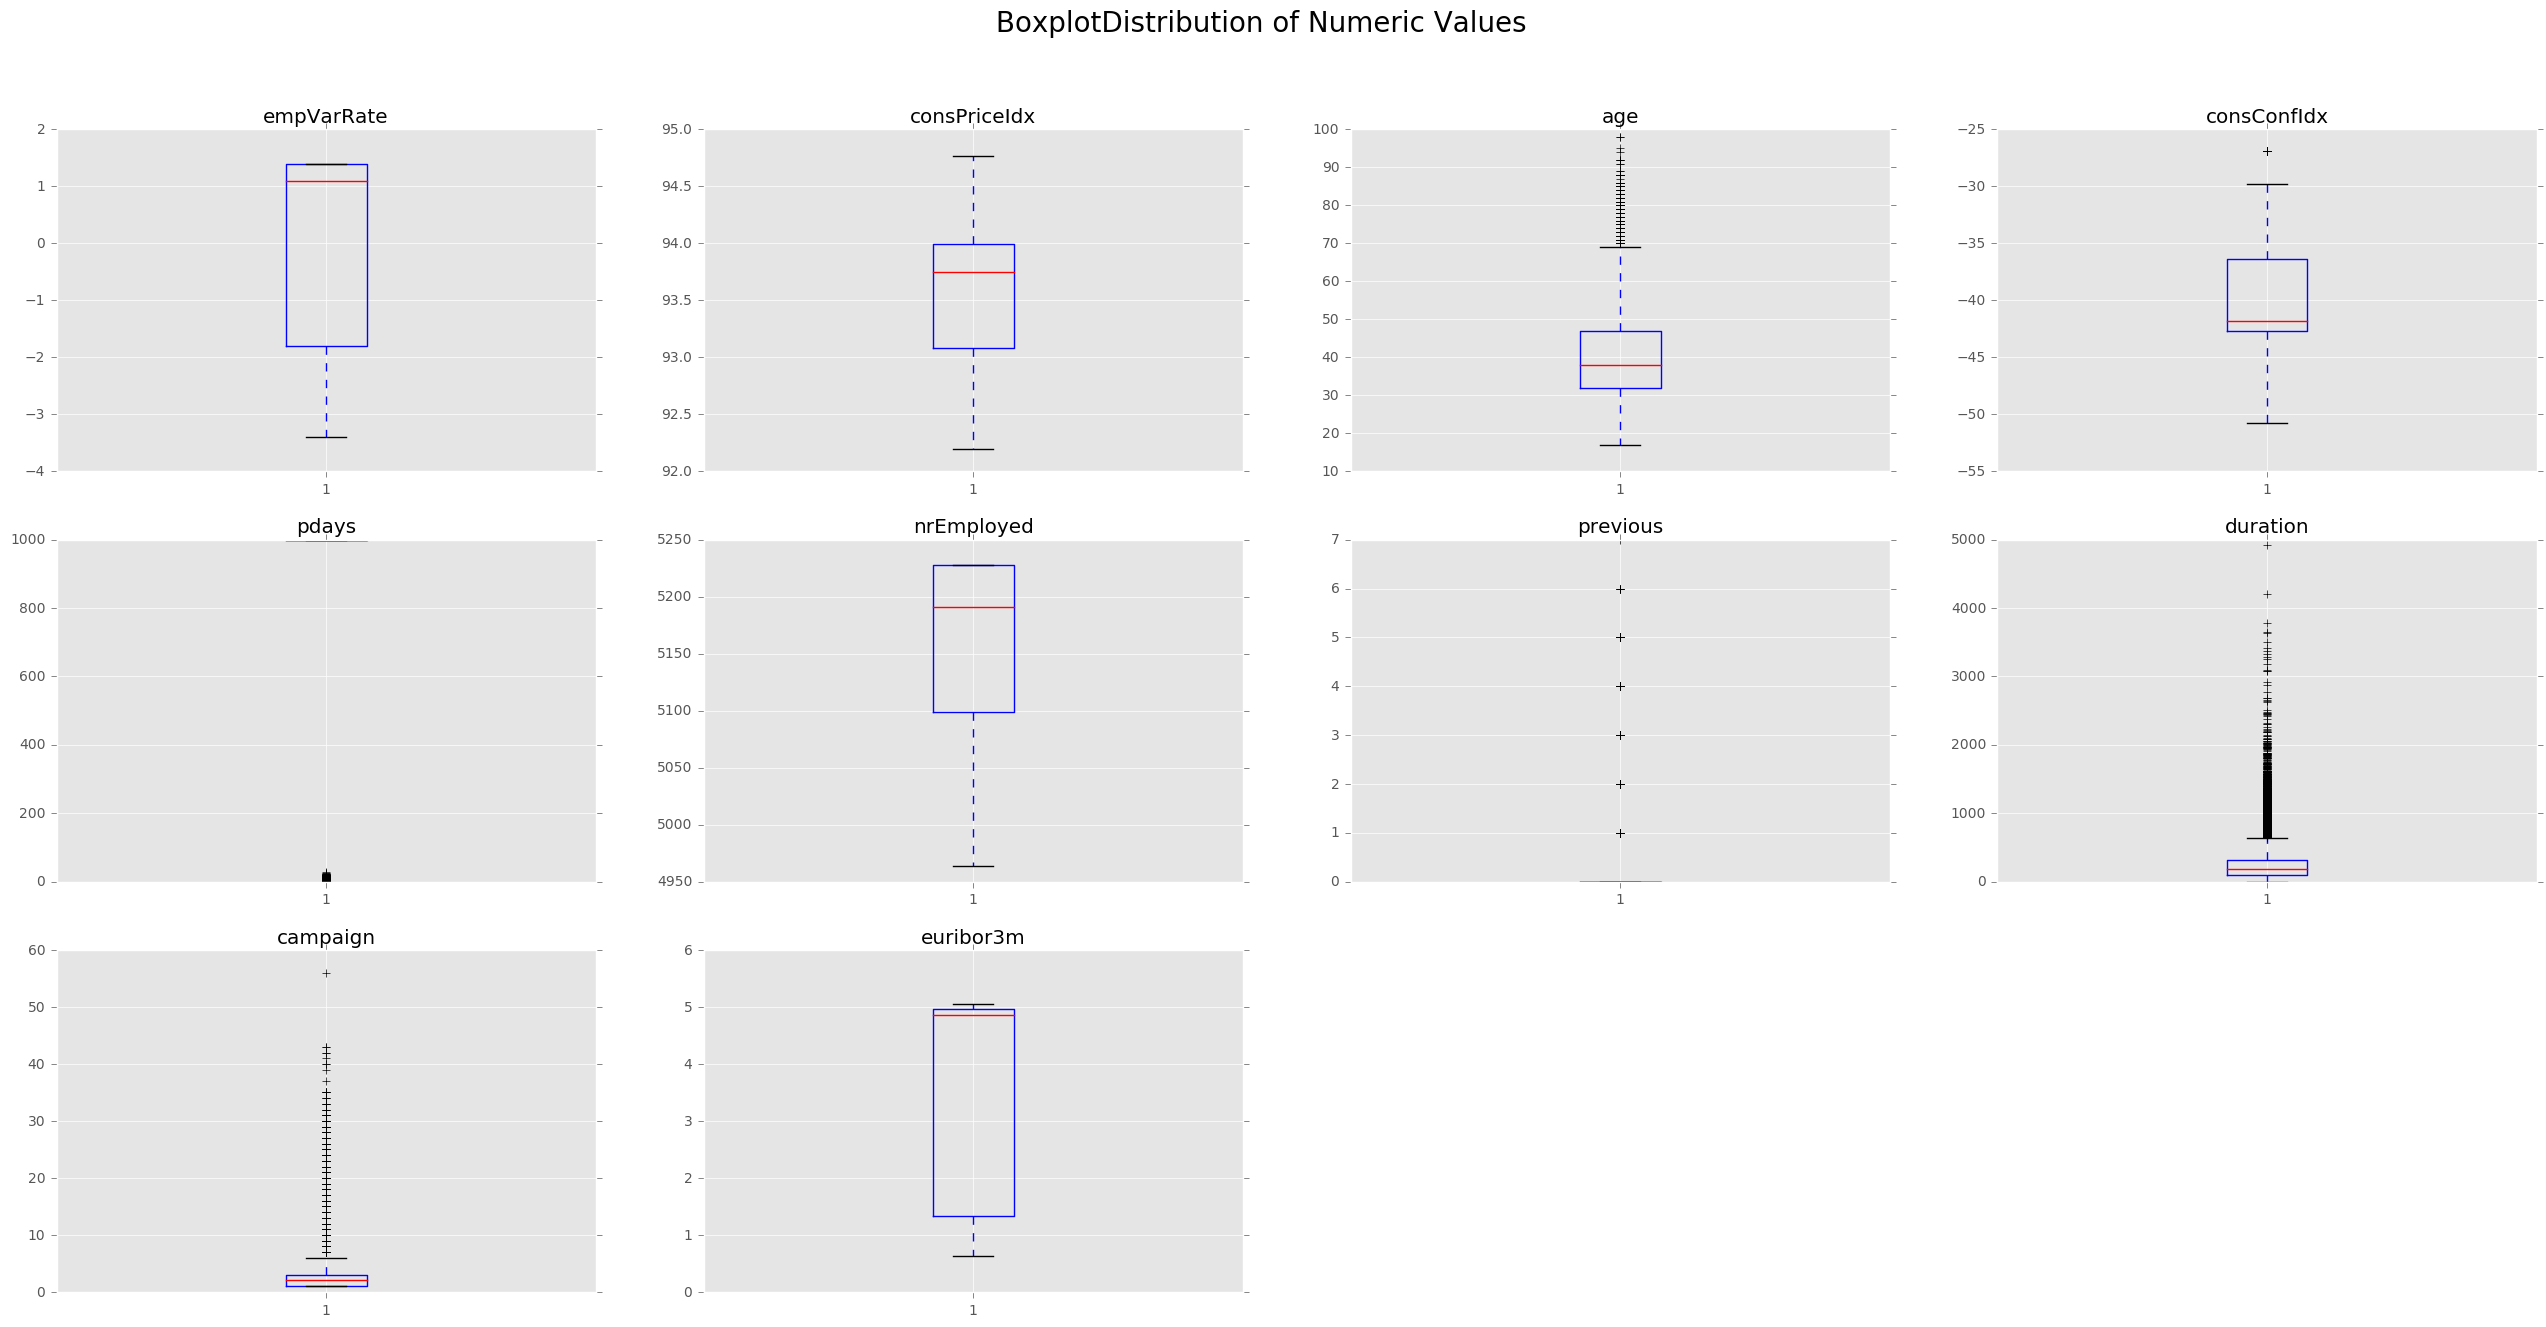

In [7]:
fig = plt.figure(figsize=(32, 15))
pltnum = 0
for col in num_features:
    plt.subplot(3, 4, pltnum+1)
    pltnum += 1
    hst = plt.boxplot(df[col])
    plt.title(col)
plt.suptitle(' BoxplotDistribution of Numeric Values', fontsize=20)
plt.show()
# fig.savefig('Boxplot of Distribution.jpg',dpi=300)
None

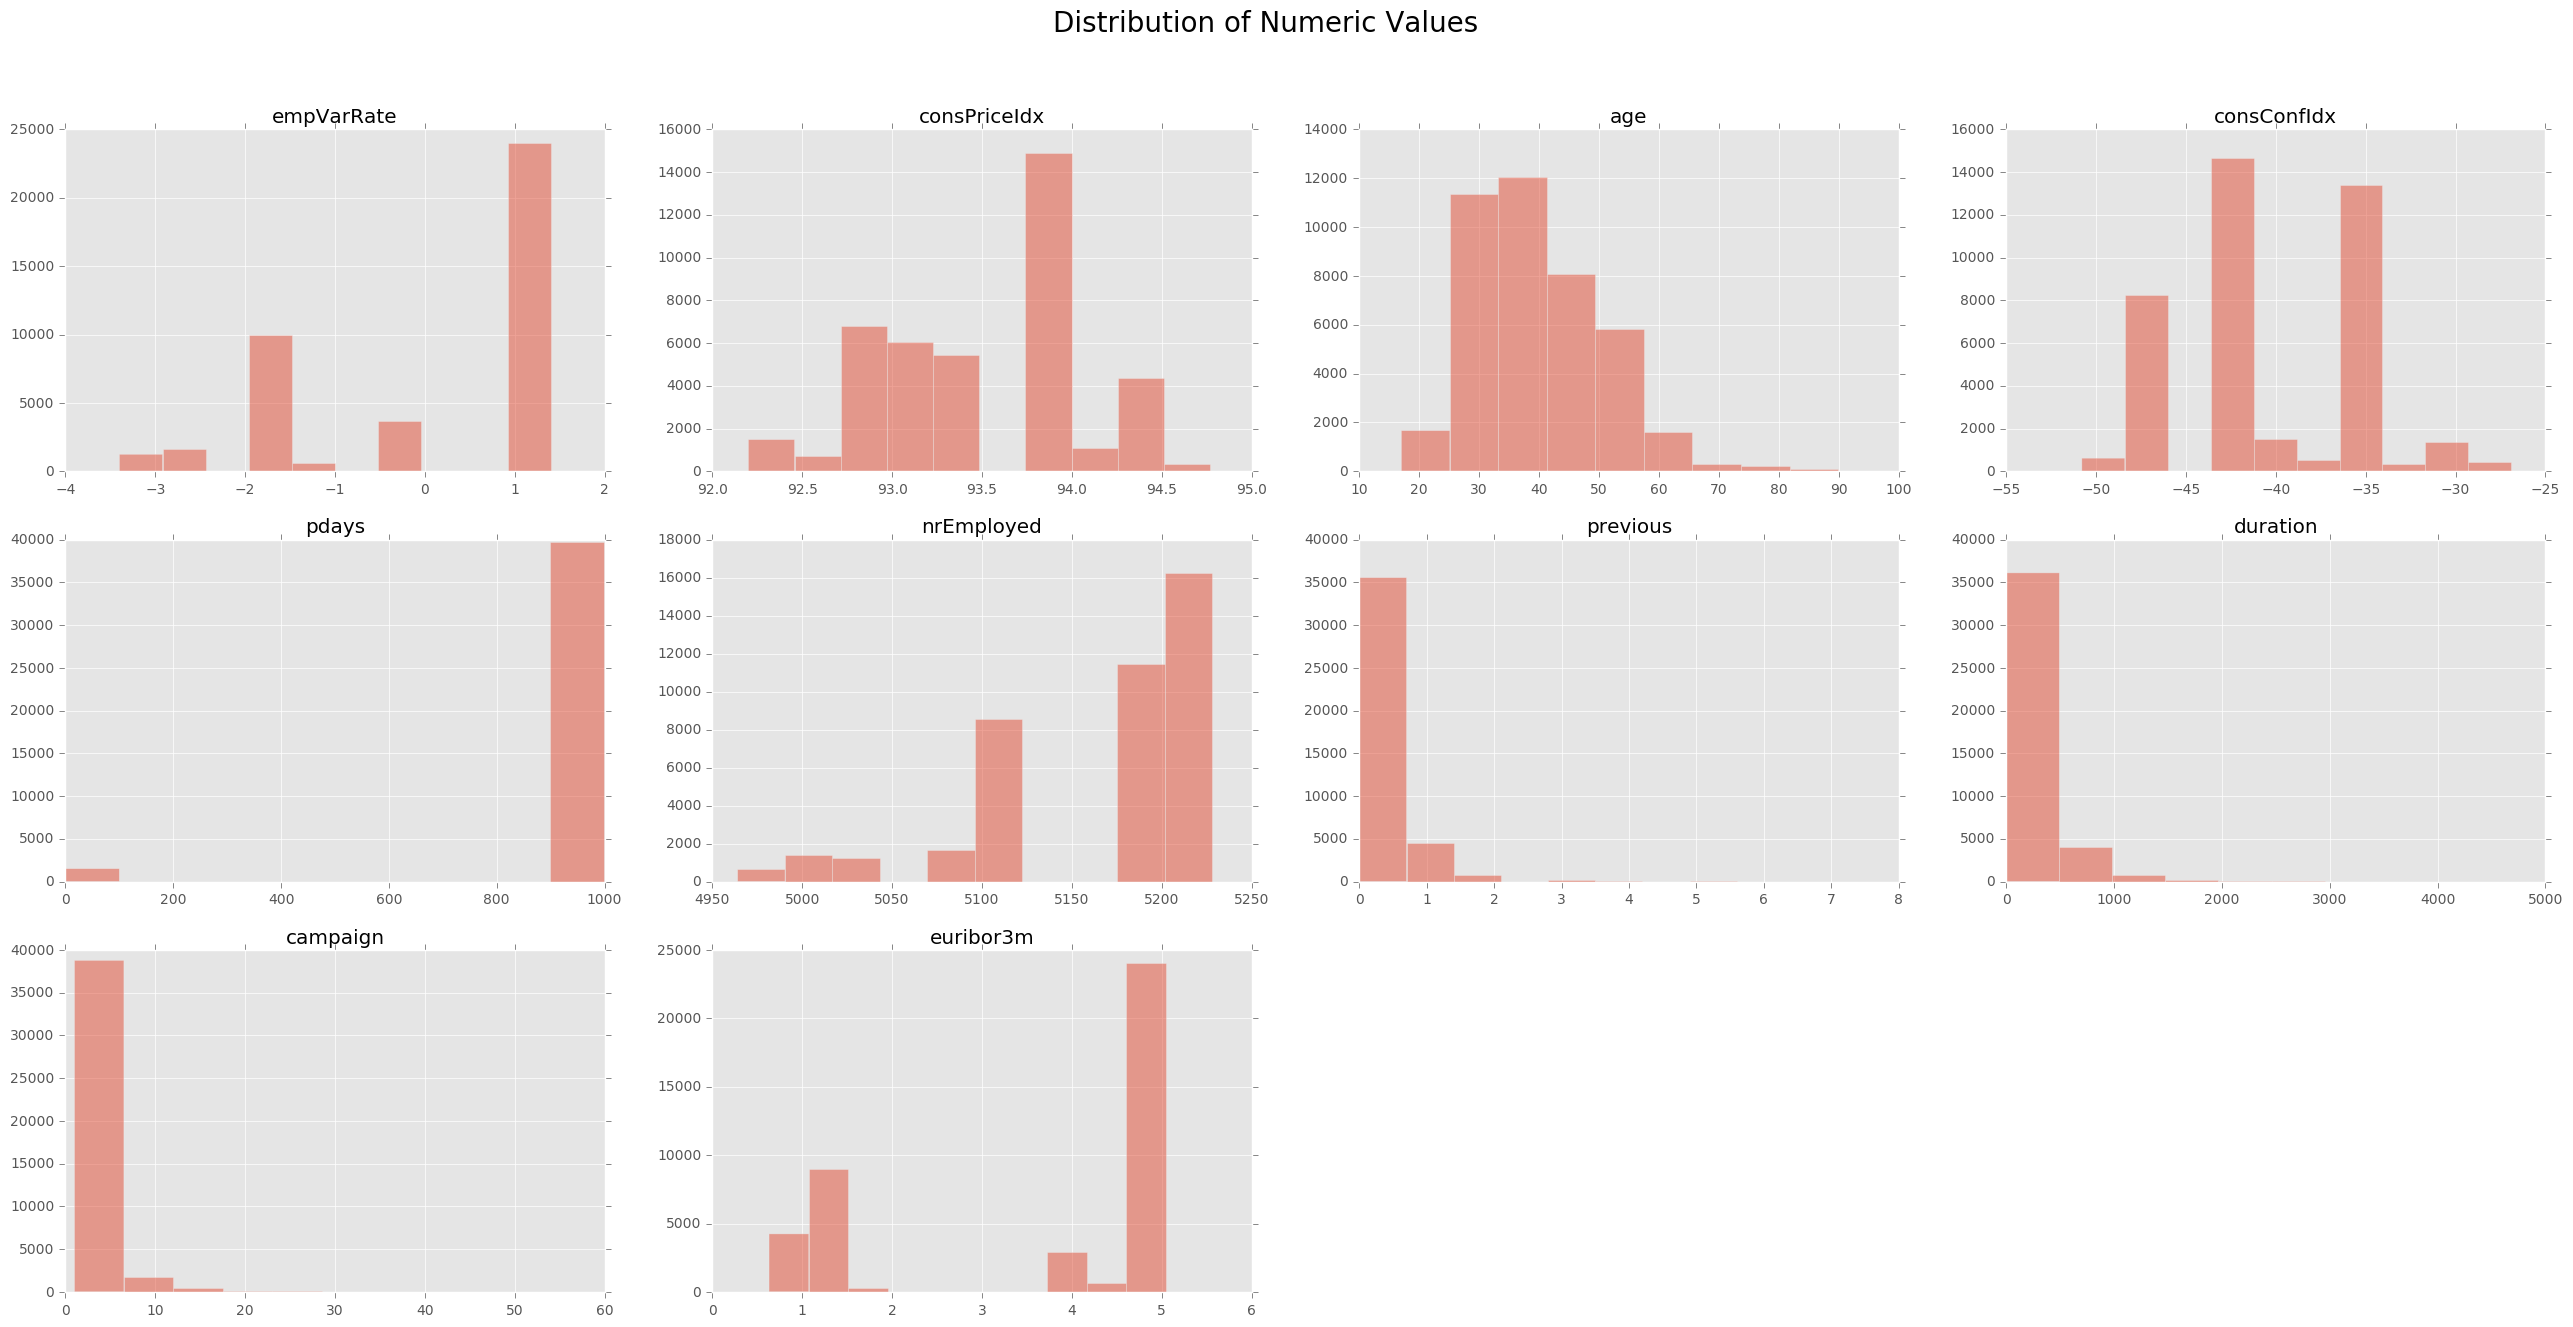

In [8]:
fig = plt.figure(figsize=(32, 15))
pltnum = 0
for col in num_features:
    plt.subplot(3, 4, pltnum+1)
    pltnum += 1
    hst = plt.hist(df[col], alpha=0.5)
    plt.title(col)
plt.suptitle('Distribution of Numeric Values', fontsize=20)
plt.show()
# fig.savefig('Distribution.jpg',dpi=300)
None

## Step2: Clean Data

Base the Data information and ditribution

In [4]:
df.drop(['duration','pdays','consConfIdx'],1,inplace=True)

Because the data has unknown values, so we coverted the 'unknown' to NaN. And drop all the NaN values.

In [5]:
df.replace({'unknown':np.nan}, inplace=True)
# df.replace({'nonexistent':np.nan}, inplace= True)
df.dropna(inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,campaign,previous,poutcome,empVarRate,consPriceIdx,euribor3m,nrEmployed,y
0,56,housemaid,married,basic4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.99,4.86,5191,0
2,37,services,married,highschool,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.99,4.86,5191,0
3,40,admin,married,basic6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.99,4.86,5191,0
4,56,services,married,highschool,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.99,4.86,5191,0
6,59,admin,married,professional,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.99,4.86,5191,0
8,24,technician,single,professional,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.99,4.86,5191,0
9,25,services,single,highschool,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.99,4.86,5191,0
11,25,services,single,highschool,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.99,4.86,5191,0
12,29,blue-collar,single,highschool,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.99,4.86,5191,0
13,57,housemaid,divorced,basic4y,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.99,4.86,5191,0


In [6]:
df.shape

(30488, 18)

#### Find the Ratio of Yes and No

In [7]:
df_yes = df[df['y']==1]
df_no = df[df['y']==0]
bi = df_yes.y.count()/df_no.y.count()
np.array([df_yes.y.count(),df_no.y.count()])

array([ 3859, 26629])

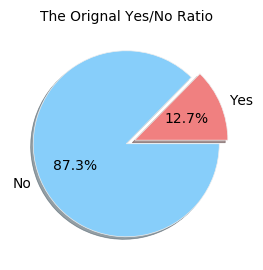

In [8]:
fig = plt.figure(figsize=(3,3))
colors = ['lightcoral', 'lightskyblue']
label = 'Yes','No'
plt.pie(np.array([df_yes.y.count(),df_no.y.count()]),colors= colors, explode=(0.1,0),shadow=True,labels=label,autopct='%1.1f%%')
plt.title('The Orignal Yes/No Ratio',fontsize=10)
# fig.savefig('Pie Ratio.pdf',dpi=300)
plt.show()

In [8]:
df_yes.shape

(3859, 18)

Because we just have 12.7% 'yse', so we decided to randomly select the same amount of 'no' data in order to form a 1:1 new dateset.

In [9]:
no = df_no.sample(n=3859,random_state=42)
no

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,campaign,previous,poutcome,empVarRate,consPriceIdx,euribor3m,nrEmployed,y
16691,28,admin,married,highschool,no,no,no,cellular,jul,wed,5,0,nonexistent,1.4,93.92,4.96,5228,0
18259,30,admin,single,highschool,no,no,no,cellular,jul,wed,3,0,nonexistent,1.4,93.92,4.96,5228,0
26610,53,self-employed,divorced,professional,no,yes,no,cellular,nov,thu,1,0,nonexistent,-0.1,93.20,4.08,5196,0
29319,36,blue-collar,married,basic9y,no,yes,no,cellular,apr,fri,3,1,failure,-1.8,93.08,1.41,5099,0
12953,47,admin,married,universitydegree,no,yes,no,cellular,jul,tue,3,0,nonexistent,1.4,93.92,4.96,5228,0
24147,52,retired,married,universitydegree,no,no,no,cellular,nov,mon,1,0,nonexistent,-0.1,93.20,4.19,5196,0
22646,31,technician,divorced,highschool,no,no,no,cellular,aug,fri,3,0,nonexistent,1.4,93.44,4.96,5228,0
18985,45,unemployed,married,universitydegree,no,yes,no,cellular,aug,mon,3,0,nonexistent,1.4,93.44,4.97,5228,0
846,24,services,single,highschool,no,no,no,telephone,may,wed,1,0,nonexistent,1.1,93.99,4.86,5191,0
7282,54,blue-collar,single,basic4y,no,no,no,telephone,may,thu,3,0,nonexistent,1.1,93.99,4.86,5191,0


In [10]:
# new data
df_raw = pd.concat([df_yes,no])
# df_raw.to_csv('NewData.csv',index=False)
df_raw.shape

(7718, 18)

In [11]:
all_features = set(df_raw.columns)-set(['y'])
num_features = set(df_raw.describe().columns)-set(['y'])
cat_features = all_features-num_features

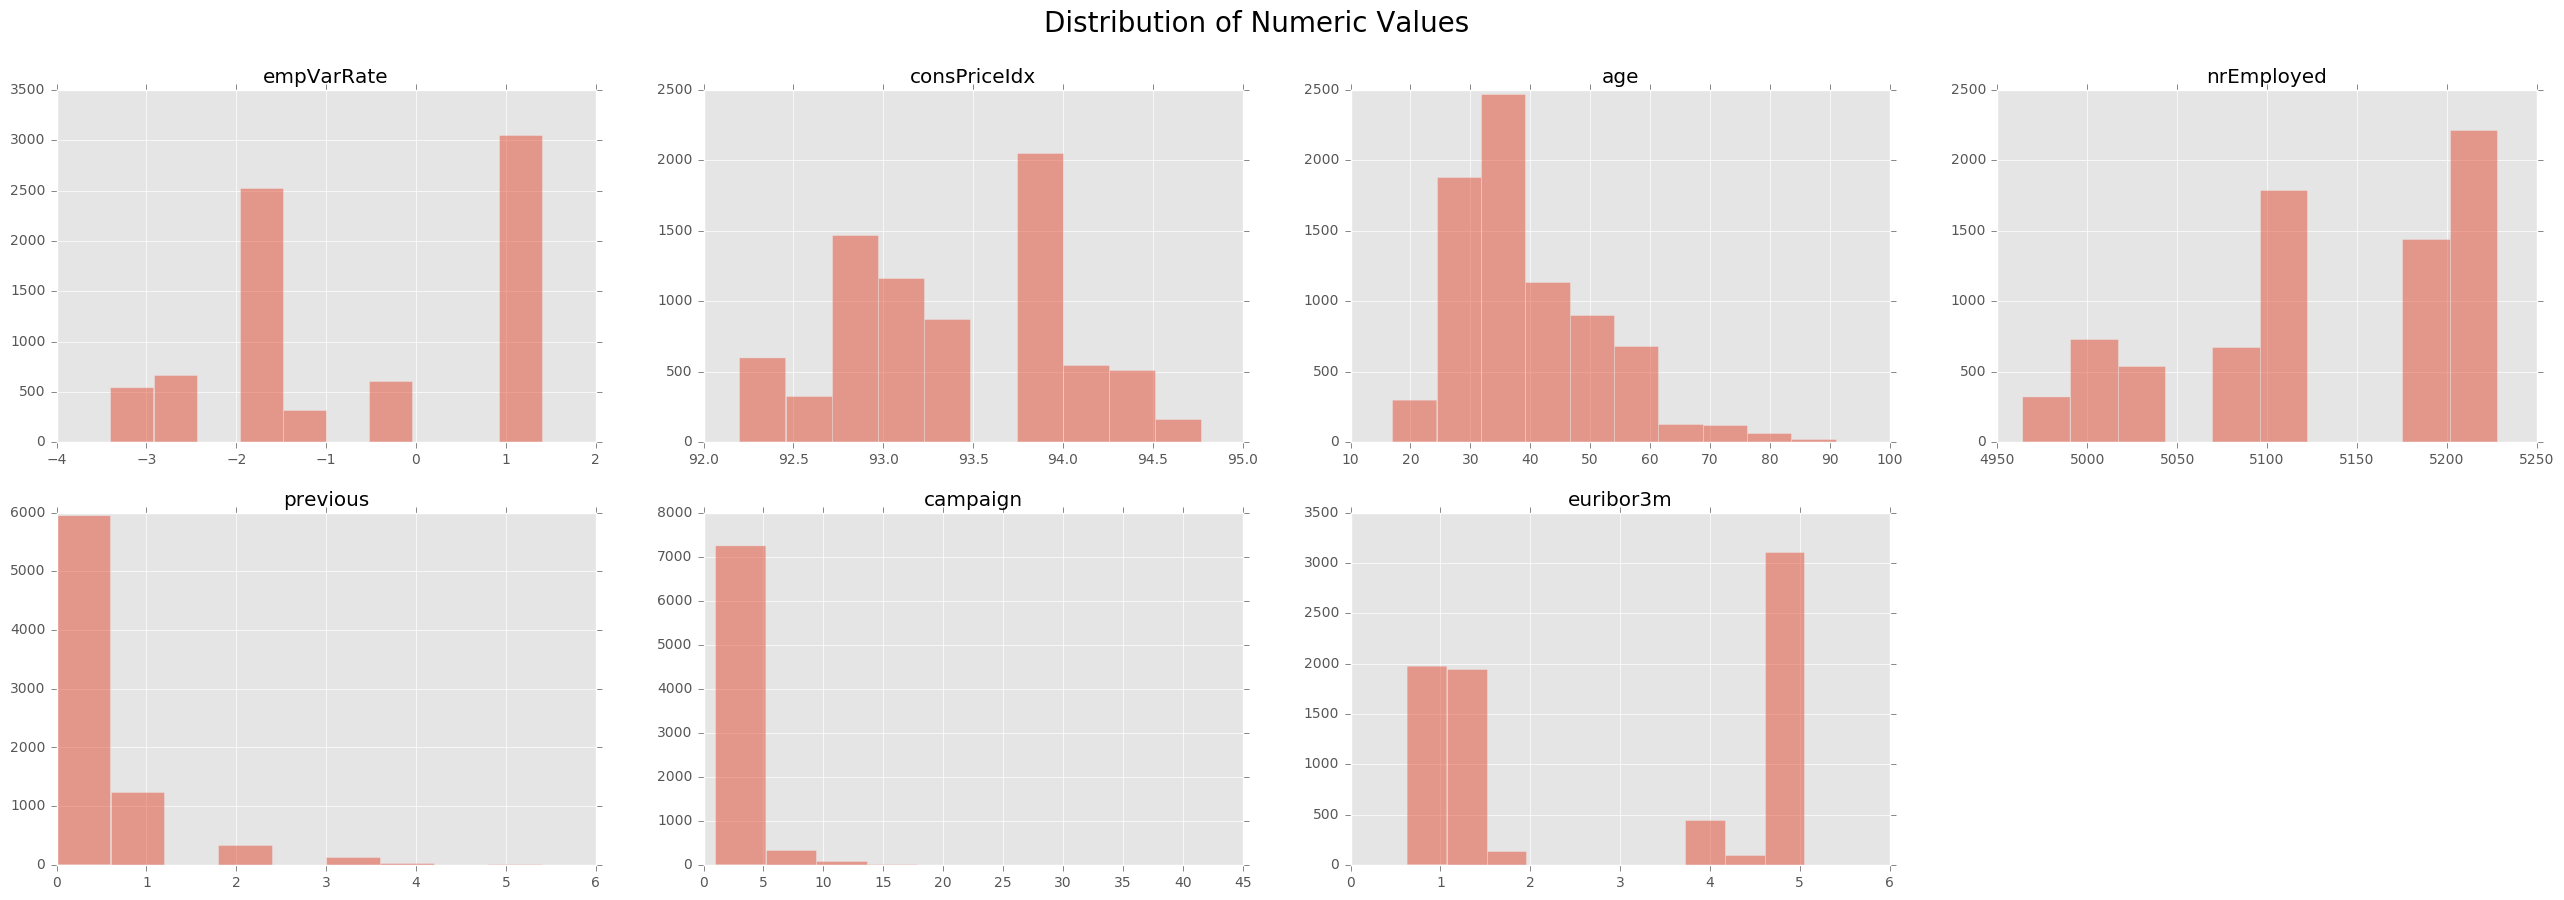

In [21]:
fig = plt.figure(figsize=(32, 10))
pltnum = 0
for col in num_features:
    plt.subplot(2, 4, pltnum+1)
    pltnum += 1
    hst = plt.hist(df_raw[col], alpha=0.5)
    plt.title(col)
plt.suptitle('Distribution of Numeric Values', fontsize=20)
plt.show()
# fig.savefig('Distribution.jpg',dpi=300)
None

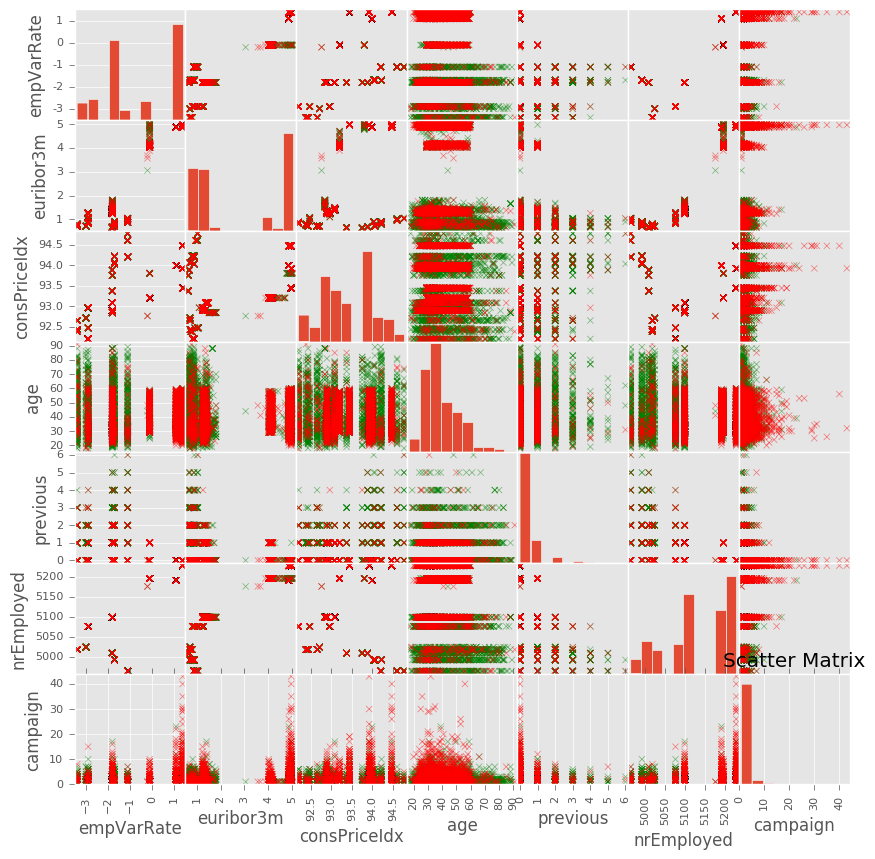

In [251]:
colors=['red','green']
scatter_matrix(df_raw[list(num_features)], alpha=0.5, figsize=(10, 10),marker='x',c=df_raw.y.apply(lambda x:colors[x]))
plt.title('Scatter Matrix')
# fig.savefig('Scatter Matrix.jpg',dpi=300)
plt.show()

#### Define dummies

In [12]:
X = df_raw.drop(['y'],1)
y = df_raw['y']

In [13]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5,random_state=42)

we use the Frequency tables to define our first round dummies for numeric attributes. 

In [14]:
X_train['age'][df_raw.age.between(17,27)] = '17_27'
X_train['age'][df_raw.age.between(28,30)] = '28_30'
X_train['age'][df_raw.age.between(31,32)] = '31_32'
X_train['age'][df_raw.age.between(33,34)] = '33_34'
X_train['age'][df_raw.age.between(35,37)] = '35_37'
X_train['age'][df_raw.age.between(38,40)] = '38_40'
X_train['age'][df_raw.age.between(41,45)] = '41_45'
X_train['age'][df_raw.age.between(46,50)] = '46_50'
X_train['age'][df_raw.age.between(51,56)] = '51_56'
X_train['age'][df_raw.age.between(57,999)] = 'above_57'
X_train['campaign'][df_raw.campaign.between(1,1)]='c_1'
X_train['campaign'][df_raw.campaign.between(2,2)]='c_2'
X_train['campaign'][df_raw.campaign.between(3,3)]='c_3'
X_train['campaign'][df_raw.campaign.between(4,4)]='c_4'
X_train['campaign'][df_raw.campaign.between(5,6)]='c_5_6'
X_train['campaign'][df_raw.campaign.between(7,10)]='c_7_10'
X_train['campaign'][df_raw.campaign.between(11,999)]='c_11above'
X_train['previous'][df_raw.previous.between(0,0)]='p_missing'
X_train['previous'][df_raw.previous.between(1,1)]='p_1'
X_train['previous'][df_raw.previous.between(2,2)]='p_2'
X_train['previous'][df_raw.previous.between(3,999)]='p_3above'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(92.20,92.65)]='92.22_92.65'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(92.71,92.84)]='92.71_92.84'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(92.89,92.89)]='92.89'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(92.96,93.08)]='92.96_93.08'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(93.2,93.37)]='93.2_93.37'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(93.44,93.44)]='93.44'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(93.75,93.88)]='93.75_93.88'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(93.92,93.92)]='93.92'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(93.99,93.99)]='93.99'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(94.03,94.22)]='94.03_94.22'
X_train['consPriceIdx'][df_raw.consPriceIdx.between(94.47,94.77)]='94.47_94.77'
X_train['euribor3m'][df_raw.euribor3m.between(0.63,0.73)]='0.63_0.73'
X_train['euribor3m'][df_raw.euribor3m.between(0.74,0.89)]='0.74_0.89'
X_train['euribor3m'][df_raw.euribor3m.between(0.9,1.26)]='0.9_1.26'
X_train['euribor3m'][df_raw.euribor3m.between(1.27,1.35)]='1.27_1.35'
X_train['euribor3m'][df_raw.euribor3m.between(1.37,1.8)]='1.37_1.8'
X_train['euribor3m'][df_raw.euribor3m.between(1.81,4.83)]='1.81_4.83'
X_train['euribor3m'][df_raw.euribor3m.between(4.86,4.86)]='4.86'
X_train['euribor3m'][df_raw.euribor3m.between(4.87,4.95)]='4.87_4.95'
X_train['euribor3m'][df_raw.euribor3m.between(4.96,4.96)]='4.96'
X_train['euribor3m'][df_raw.euribor3m.between(4.97,99,0.01)]='4.97above'
X_train['nrEmployed'][df_raw.nrEmployed.between(4964,4992)]='4964_4992'
X_train['nrEmployed'][df_raw.nrEmployed.between(5009,5018)]='5009_5018'
X_train['nrEmployed'][df_raw.nrEmployed.between(5024,5076)]='5024_5076'
X_train['nrEmployed'][df_raw.nrEmployed.between(5099,5176)]='5099_5176'
X_train['nrEmployed'][df_raw.nrEmployed.between(5191,5191)]='5191'
X_train['nrEmployed'][df_raw.nrEmployed.between(5196,5196)]='5196'
X_train['nrEmployed'][df_raw.nrEmployed.between(5228,5228)]='5228'
X_train

/Users/xunzha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/xunzha/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:4695: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/xunzha/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,campaign,previous,poutcome,empVarRate,consPriceIdx,euribor3m,nrEmployed
2421,28_30,technician,married,universitydegree,no,yes,no,telephone,may,tue,c_2,p_missing,nonexistent,1.1,93.99,4.86,5191
20529,31_32,technician,single,universitydegree,no,no,yes,cellular,aug,tue,c_4,p_missing,nonexistent,1.4,93.44,4.97above,5228
19602,38_40,admin,married,universitydegree,no,no,no,cellular,aug,thu,c_2,p_missing,nonexistent,1.4,93.44,4.97above,5228
10444,46_50,unemployed,divorced,basic4y,no,no,yes,telephone,jun,mon,c_2,p_missing,nonexistent,1.4,94.47_94.77,4.96,5228
31609,28_30,admin,married,highschool,no,yes,no,cellular,may,thu,c_1,p_missing,nonexistent,-1.8,92.89,1.27_1.35,5099_5176
13696,28_30,blue-collar,single,basic9y,no,no,no,cellular,jul,thu,c_1,p_missing,nonexistent,1.4,93.92,4.96,5228
30330,17_27,student,single,highschool,no,no,no,cellular,apr,thu,c_1,p_missing,nonexistent,-1.8,92.96_93.08,1.37_1.8,5099_5176
35396,31_32,admin,single,professional,no,yes,yes,telephone,may,fri,c_4,p_missing,nonexistent,-1.8,92.89,0.9_1.26,5099_5176
38796,31_32,self-employed,married,universitydegree,no,no,no,cellular,nov,thu,c_2,p_2,success,-3.4,92.22_92.65,0.63_0.73,5009_5018
41058,above_57,retired,married,basic4y,no,yes,no,cellular,oct,wed,c_1,p_3above,success,-1.1,94.47_94.77,0.9_1.26,4964_4992


Transfrom test dataset

In [15]:
X_test['age'][df_raw.age.between(17,27)] = '17_27'
X_test['age'][df_raw.age.between(28,30)] = '28_30'
X_test['age'][df_raw.age.between(31,32)] = '31_32'
X_test['age'][df_raw.age.between(33,34)] = '33_34'
X_test['age'][df_raw.age.between(35,37)] = '35_37'
X_test['age'][df_raw.age.between(38,40)] = '38_40'
X_test['age'][df_raw.age.between(41,45)] = '41_45'
X_test['age'][df_raw.age.between(46,50)] = '46_50'
X_test['age'][df_raw.age.between(51,56)] = '51_56'
X_test['age'][df_raw.age.between(57,999)] = 'above_57'
X_test['campaign'][df_raw.campaign.between(1,1)]='c_1'
X_test['campaign'][df_raw.campaign.between(2,2)]='c_2'
X_test['campaign'][df_raw.campaign.between(3,3)]='c_3'
X_test['campaign'][df_raw.campaign.between(4,4)]='c_4'
X_test['campaign'][df_raw.campaign.between(5,6)]='c_5_6'
X_test['campaign'][df_raw.campaign.between(7,10)]='c_7_10'
X_test['campaign'][df_raw.campaign.between(11,999)]='c_11above'
X_test['previous'][df_raw.previous.between(0,0)]='p_missing'
X_test['previous'][df_raw.previous.between(1,1)]='p_1'
X_test['previous'][df_raw.previous.between(2,2)]='p_2'
X_test['previous'][df_raw.previous.between(3,999)]='p_3above'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(92.20,92.65)]='92.22_92.65'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(92.71,92.84)]='92.71_92.84'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(92.89,92.89)]='92.89'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(92.96,93.08)]='92.96_93.08'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(93.2,93.37)]='93.2_93.37'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(93.44,93.44)]='93.44'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(93.75,93.88)]='93.75_93.88'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(93.92,93.92)]='93.92'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(93.99,93.99)]='93.99'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(94.03,94.22)]='94.03_94.22'
X_test['consPriceIdx'][df_raw.consPriceIdx.between(94.47,94.77)]='94.47_94.77'
X_test['euribor3m'][df_raw.euribor3m.between(0.63,0.73)]='0.63_0.73'
X_test['euribor3m'][df_raw.euribor3m.between(0.74,0.89)]='0.74_0.89'
X_test['euribor3m'][df_raw.euribor3m.between(0.9,1.26)]='0.9_1.26'
X_test['euribor3m'][df_raw.euribor3m.between(1.27,1.35)]='1.27_1.35'
X_test['euribor3m'][df_raw.euribor3m.between(1.37,1.8)]='1.37_1.8'
X_test['euribor3m'][df_raw.euribor3m.between(1.81,4.83)]='1.81_4.83'
X_test['euribor3m'][df_raw.euribor3m.between(4.86,4.86)]='4.86'
X_test['euribor3m'][df_raw.euribor3m.between(4.87,4.95)]='4.87_4.95'
X_test['euribor3m'][df_raw.euribor3m.between(4.96,4.96)]='4.96'
X_test['euribor3m'][df_raw.euribor3m.between(4.97,99,0.01)]='4.97above'
X_test['nrEmployed'][df_raw.nrEmployed.between(4964,4992)]='4964_4992'
X_test['nrEmployed'][df_raw.nrEmployed.between(5009,5018)]='5009_5018'
X_test['nrEmployed'][df_raw.nrEmployed.between(5024,5076)]='5024_5076'
X_test['nrEmployed'][df_raw.nrEmployed.between(5099,5176)]='5099_5176'
X_test['nrEmployed'][df_raw.nrEmployed.between(5191,5191)]='5191'
X_test['nrEmployed'][df_raw.nrEmployed.between(5196,5196)]='5196'
X_test['nrEmployed'][df_raw.nrEmployed.between(5228,5228)]='5228'
X_test

/Users/xunzha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/xunzha/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:4695: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/xunzha/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,campaign,previous,poutcome,empVarRate,consPriceIdx,euribor3m,nrEmployed
6360,51_56,services,married,highschool,no,no,no,telephone,may,tue,c_5_6,p_missing,nonexistent,1.1,93.99,4.86,5191
16133,35_37,services,divorced,universitydegree,no,no,yes,cellular,jul,tue,c_2,p_missing,nonexistent,1.4,93.92,4.96,5228
40424,17_27,admin,single,universitydegree,no,yes,no,cellular,aug,fri,c_2,p_missing,nonexistent,-1.7,94.03_94.22,0.9_1.26,4964_4992
20638,35_37,technician,married,universitydegree,no,yes,no,cellular,aug,wed,c_1,p_missing,nonexistent,1.4,93.44,4.97above,5228
37332,17_27,student,single,professional,no,yes,no,cellular,aug,tue,c_2,p_1,failure,-2.9,92.22_92.65,0.74_0.89,5024_5076
22152,28_30,admin,single,universitydegree,no,yes,no,cellular,aug,thu,c_1,p_missing,nonexistent,1.4,93.44,4.96,5228
25132,38_40,technician,single,universitydegree,no,no,no,cellular,nov,tue,c_1,p_1,failure,-0.1,93.2_93.37,1.81_4.83,5196
23384,51_56,management,married,universitydegree,no,no,no,cellular,aug,wed,c_2,p_missing,nonexistent,1.4,93.44,4.96,5228
38386,17_27,student,single,highschool,no,no,no,cellular,oct,mon,c_1,p_missing,nonexistent,-3.4,92.22_92.65,0.74_0.89,5009_5018
41160,33_34,admin,married,universitydegree,no,no,no,cellular,nov,tue,c_1,p_missing,nonexistent,-1.1,94.47_94.77,0.9_1.26,4964_4992


Using Crosstab analysis for defining the second round dummies base on the trend of all dummies of first round.

In [16]:
X_frTable = pd.concat([X_train,y_train],1)
X_frTable

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,campaign,previous,poutcome,empVarRate,consPriceIdx,euribor3m,nrEmployed,y
2421,28_30,technician,married,universitydegree,no,yes,no,telephone,may,tue,c_2,p_missing,nonexistent,1.1,93.99,4.86,5191,1
20529,31_32,technician,single,universitydegree,no,no,yes,cellular,aug,tue,c_4,p_missing,nonexistent,1.4,93.44,4.97above,5228,1
19602,38_40,admin,married,universitydegree,no,no,no,cellular,aug,thu,c_2,p_missing,nonexistent,1.4,93.44,4.97above,5228,0
10444,46_50,unemployed,divorced,basic4y,no,no,yes,telephone,jun,mon,c_2,p_missing,nonexistent,1.4,94.47_94.77,4.96,5228,0
31609,28_30,admin,married,highschool,no,yes,no,cellular,may,thu,c_1,p_missing,nonexistent,-1.8,92.89,1.27_1.35,5099_5176,0
13696,28_30,blue-collar,single,basic9y,no,no,no,cellular,jul,thu,c_1,p_missing,nonexistent,1.4,93.92,4.96,5228,0
30330,17_27,student,single,highschool,no,no,no,cellular,apr,thu,c_1,p_missing,nonexistent,-1.8,92.96_93.08,1.37_1.8,5099_5176,1
35396,31_32,admin,single,professional,no,yes,yes,telephone,may,fri,c_4,p_missing,nonexistent,-1.8,92.89,0.9_1.26,5099_5176,0
38796,31_32,self-employed,married,universitydegree,no,no,no,cellular,nov,thu,c_2,p_2,success,-3.4,92.22_92.65,0.63_0.73,5009_5018,1
41058,above_57,retired,married,basic4y,no,yes,no,cellular,oct,wed,c_1,p_3above,success,-1.1,94.47_94.77,0.9_1.26,4964_4992,1


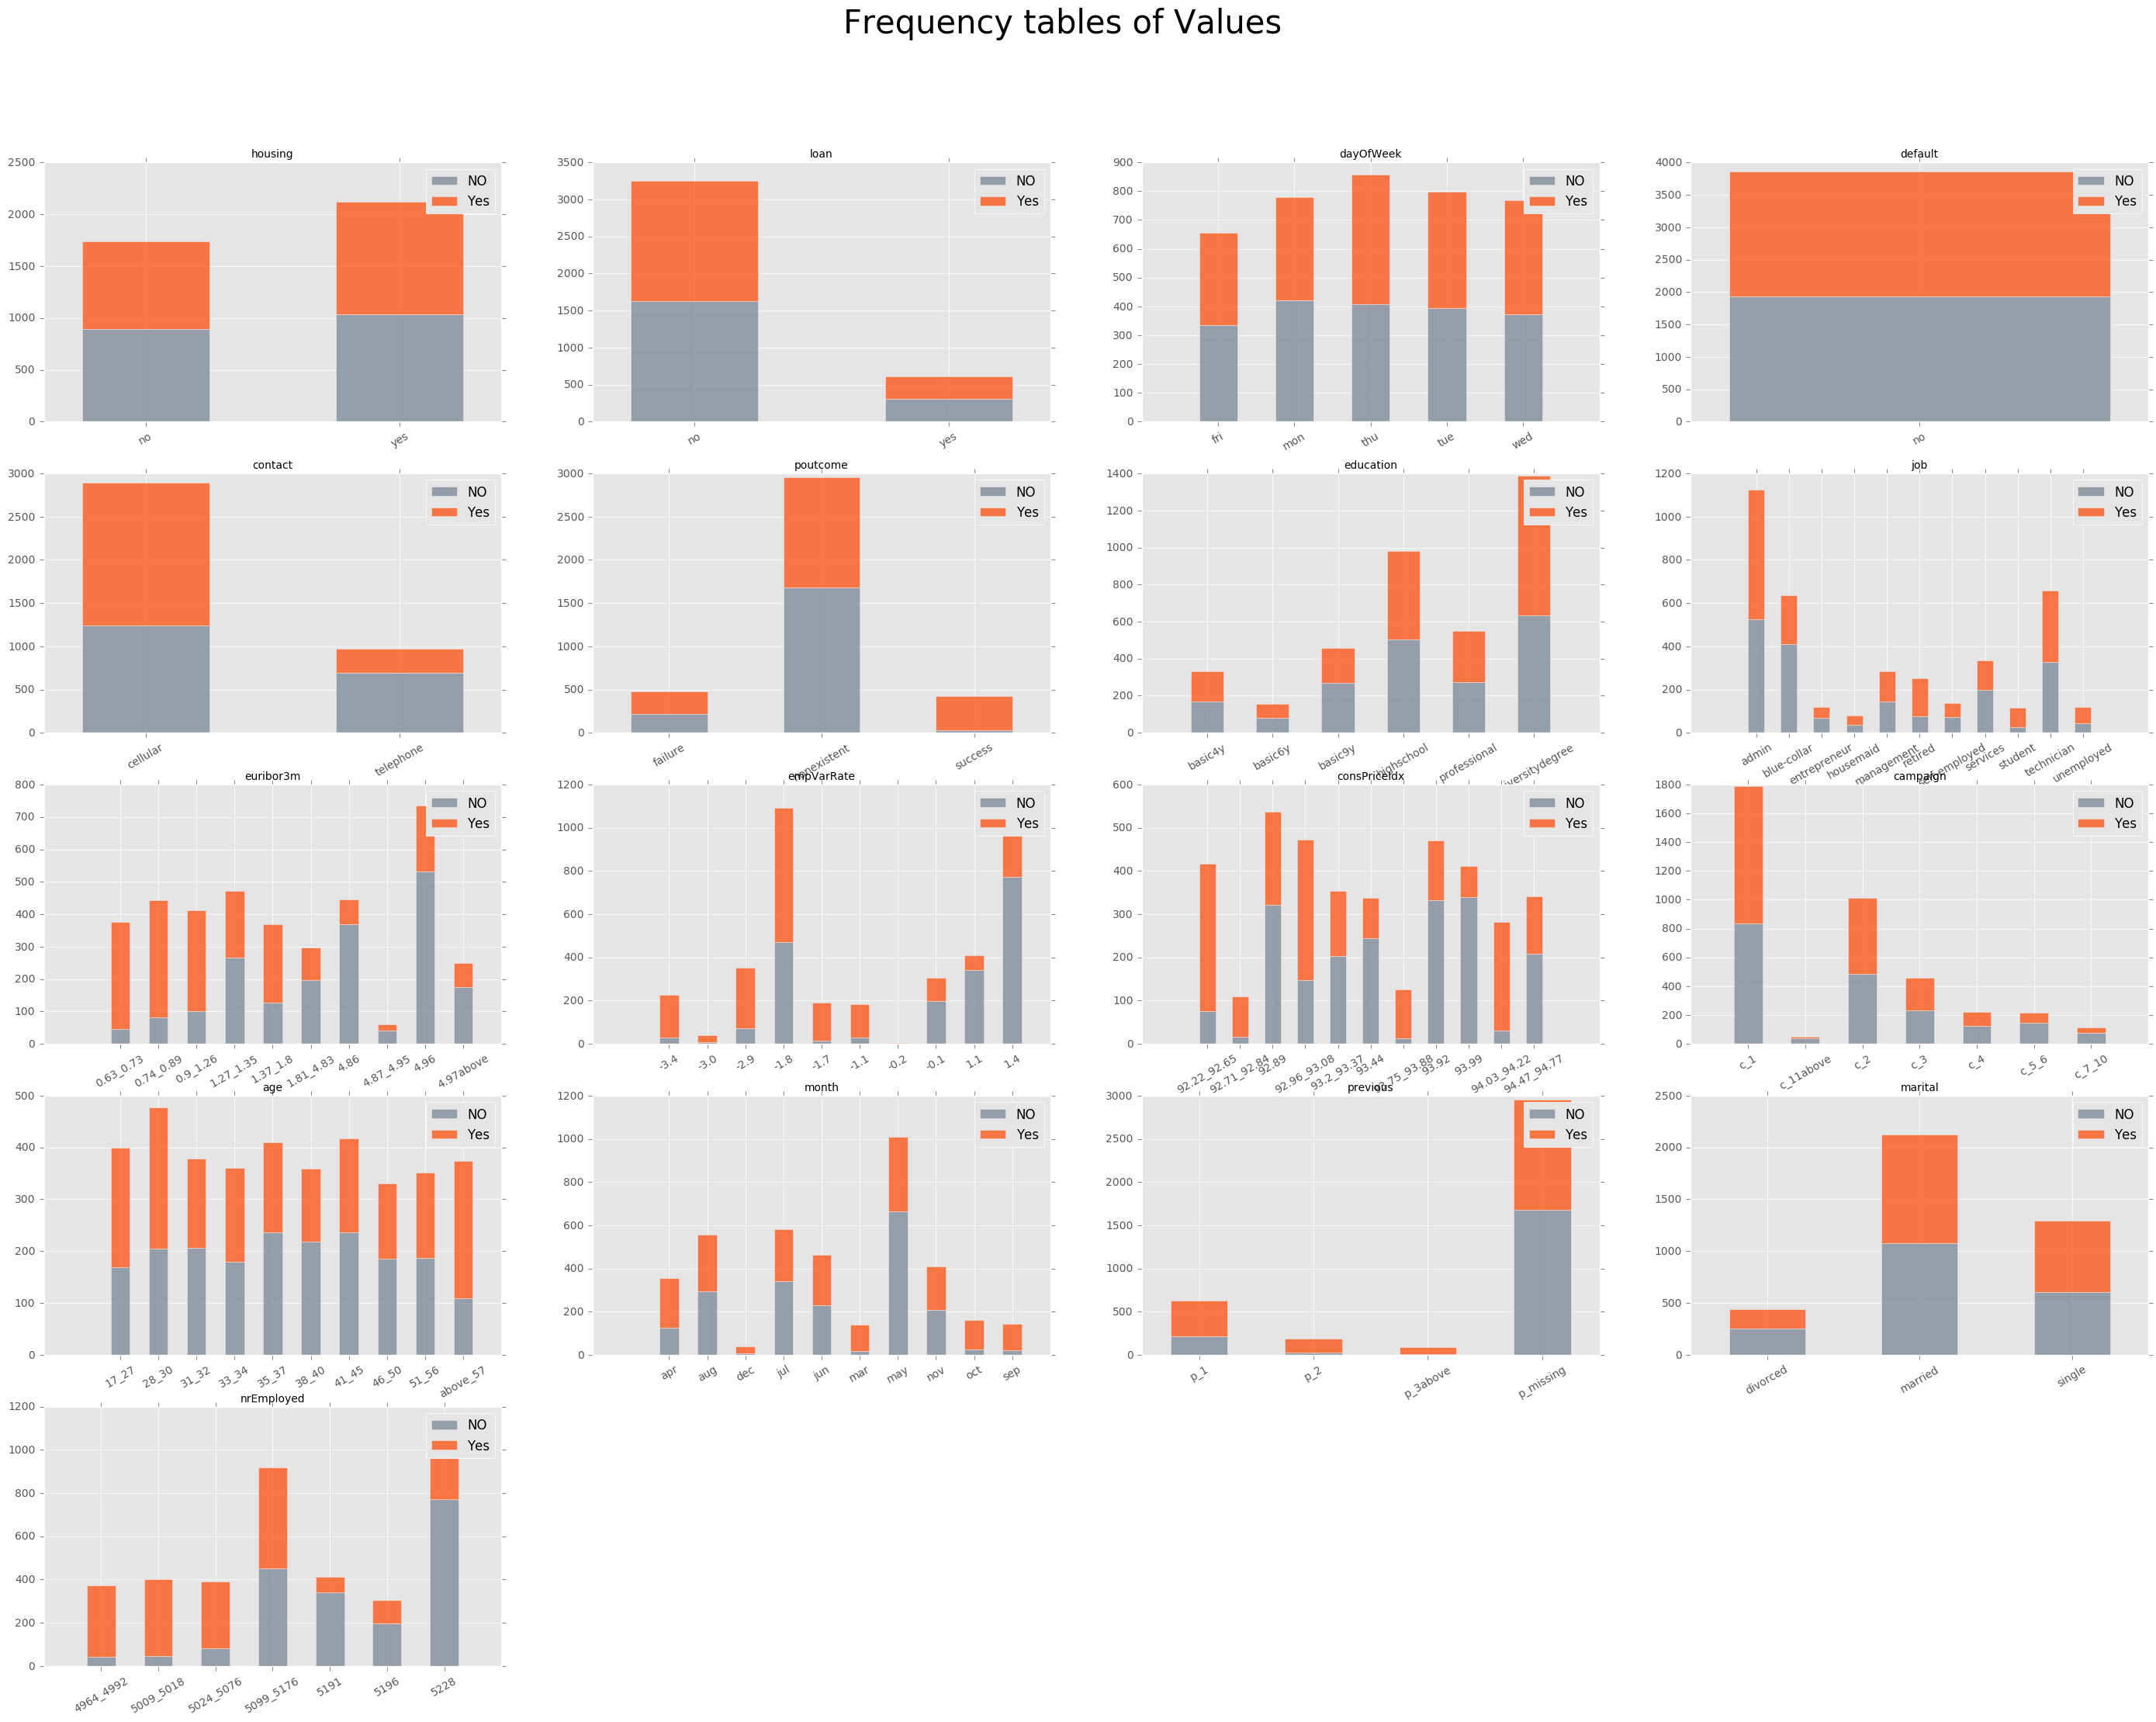

In [32]:
fig = plt.figure(figsize=(35, 25))
pltnum = 0
for col in all_features:
    tab = pd.crosstab(X_frTable[col],X_frTable['y'],  margins = False)
    del tab.index.name
    plt.subplot(5, 4,pltnum + 1)
    pltnum += 1
    plt.bar(range(len(tab.index)),tab[0],width=0.5,color='#708090',alpha=.7,align='center',label='NO')
    plt.bar(range(len(tab.index)),tab[1],width=0.5,color='#ff4500',bottom = tab[0],alpha=.7,align='center',label='Yes' )
    plt.xticks(range(len(tab.index)), [y for y in tab.index], rotation=30, fontsize=10)
    plt.title(col,fontsize=10)
    plt.legend()
plt.suptitle('Frequency tables of Values', fontsize=30)
plt.show()
# fig.savefig('Frequency.jpg',dpi=300)
None

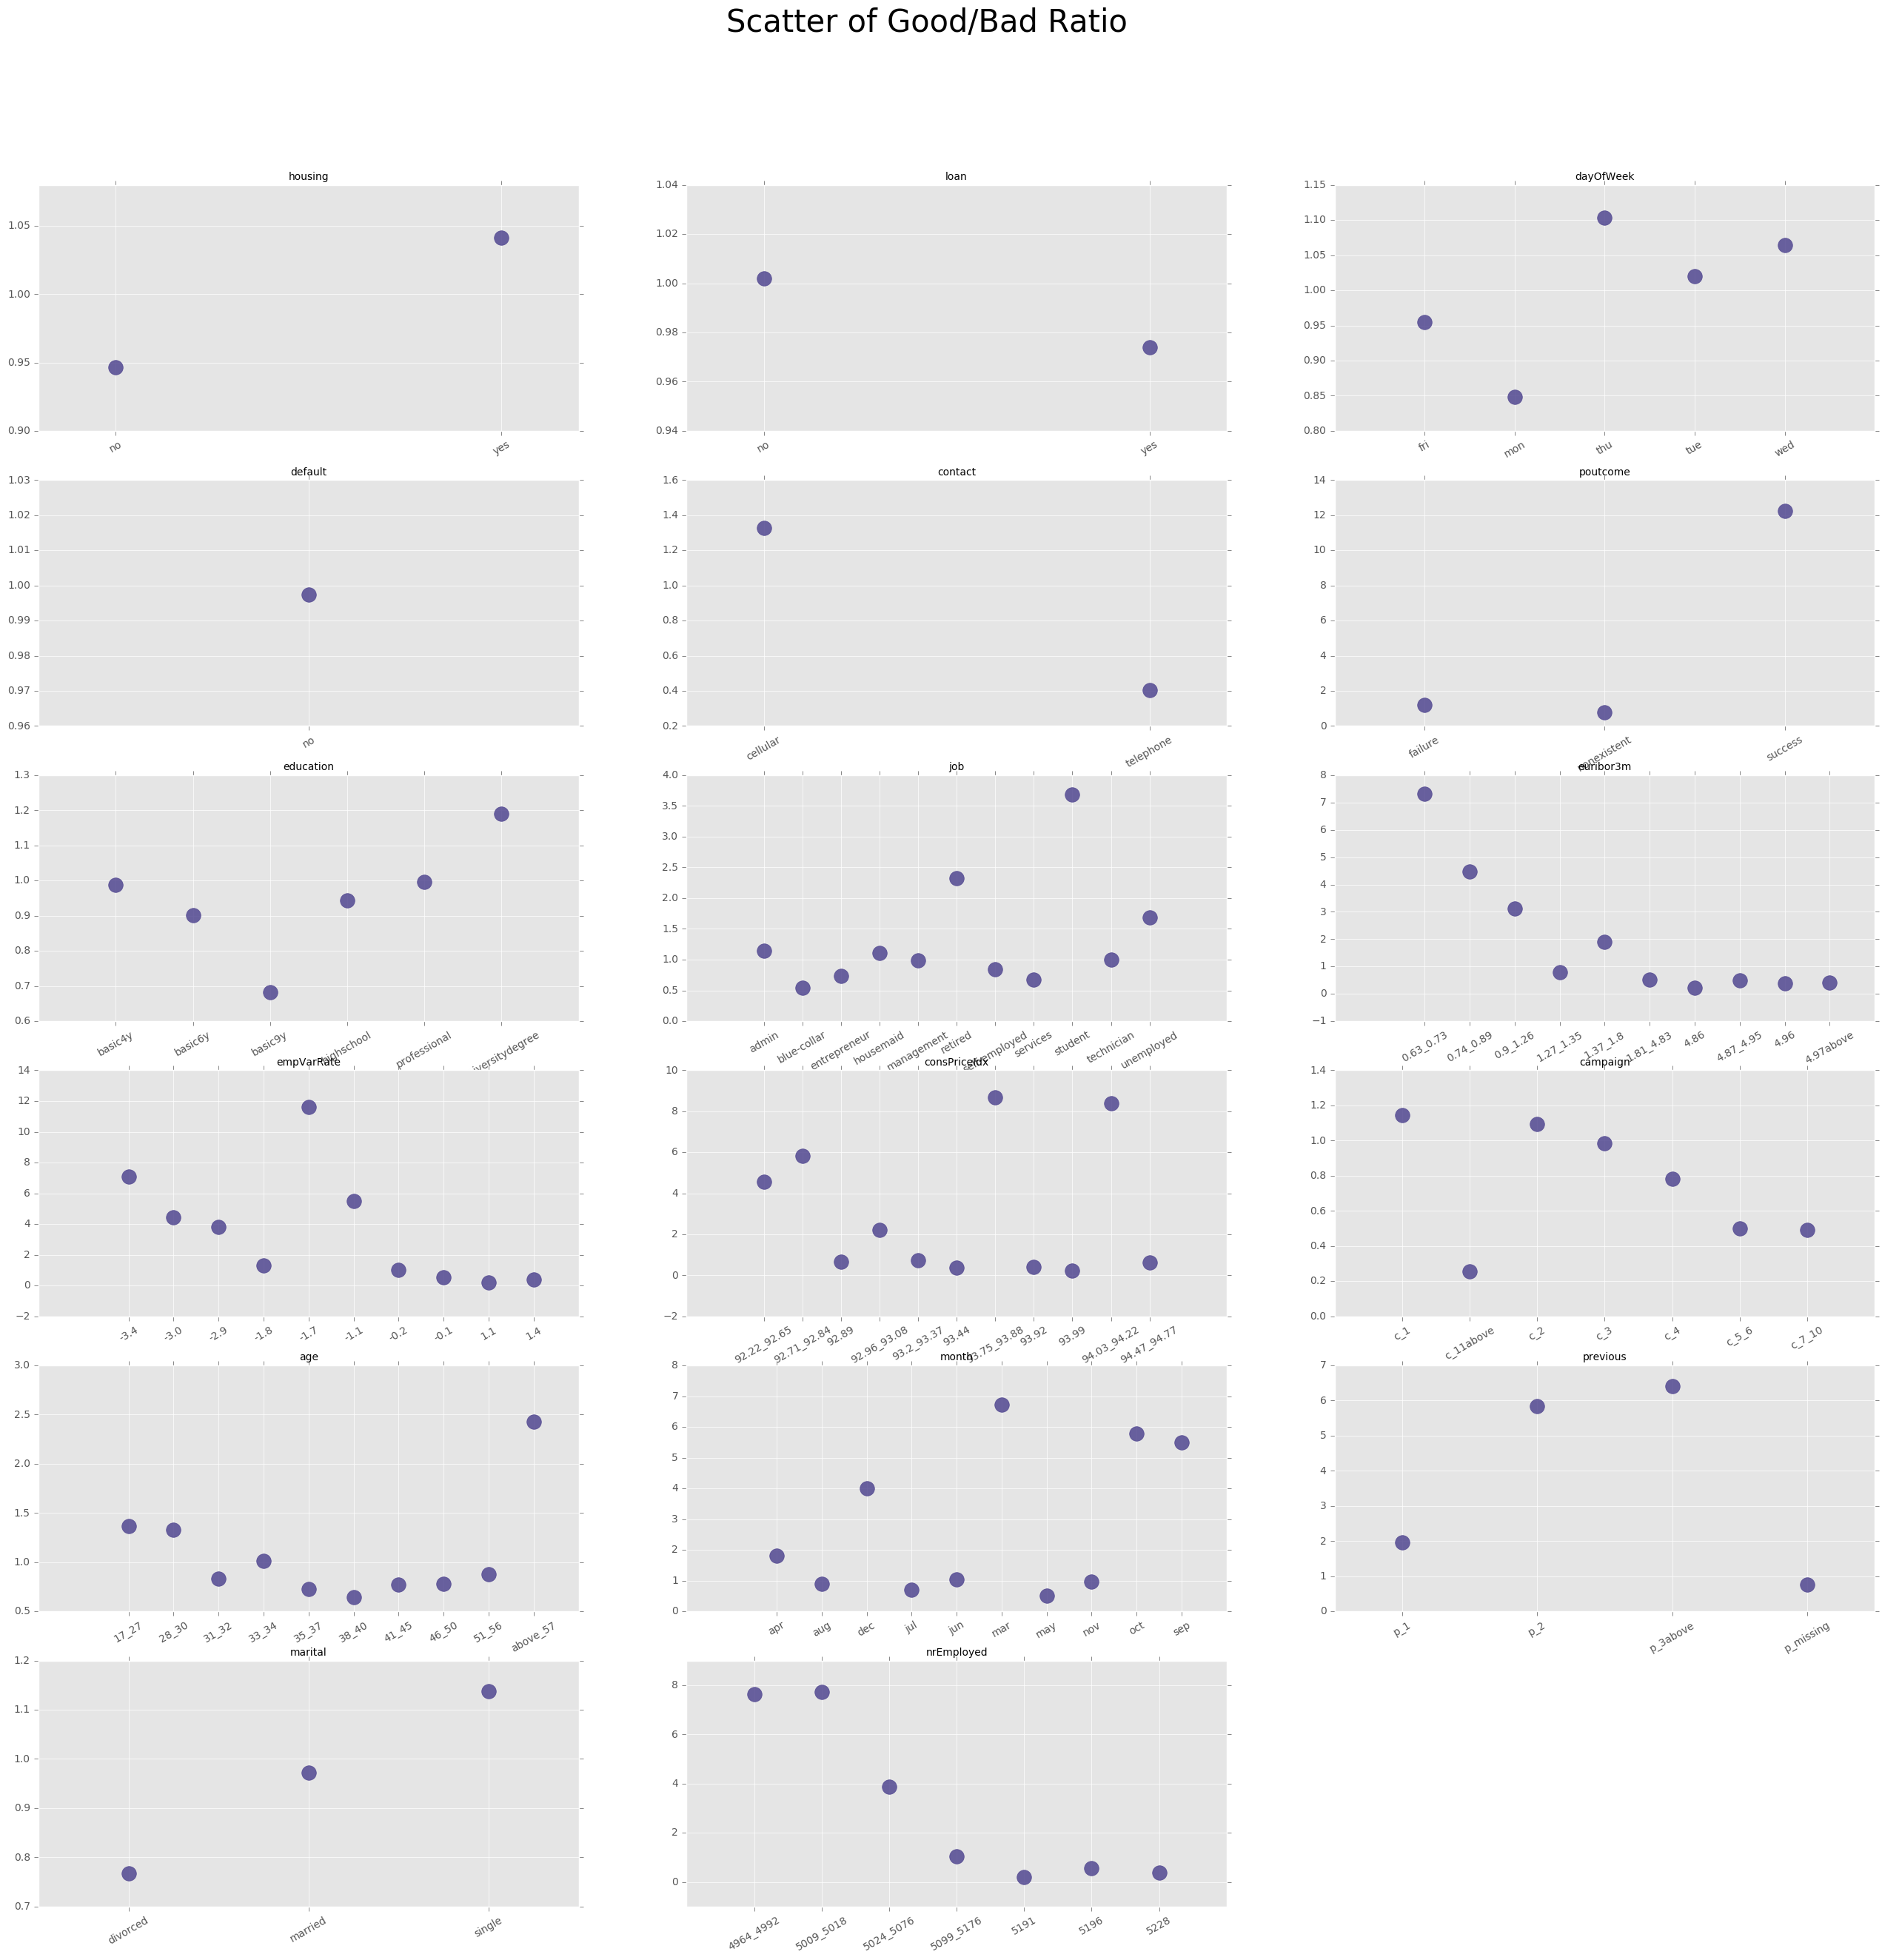

In [35]:
fig = plt.figure(figsize=(32, 30))
pltnum = 0
for col in all_features:
    tab = pd.crosstab(X_frTable[col],X_frTable['y'],  margins = False)
    del tab.index.name
    tab = pd.DataFrame(tab[1]/tab[0])
    plt.subplot(6, 3,pltnum + 1)
    pltnum += 1
    plt.scatter(range(len(tab.index)), tab[0],marker='o',s=200,alpha=0.8,color = '#483d8b')
    plt.xticks(range(len(tab.index)), [y for y in tab.index], rotation=30, fontsize=10)
    plt.title(col,fontsize=10)
plt.suptitle('Scatter of Good/Bad Ratio', fontsize=30)
plt.show()
# fig.savefig('Scatter ratio.jpg',dpi=300)
None

In [17]:
X_train['age'][X_train.age == 'above_57'] = 'Age_Netural'
X_train['age'][X_train.age.isin(['41_45','46_50','51_56'])] = '41_56'
X_train['campaign'][X_train.campaign == 'c_11above'] = 'Cam_Netural'
X_train['empVarRate'][X_train.empVarRate.isin([-0.2, -0.1, 1.1, 1.4])] = '-0.2_1.4'
X_train['empVarRate'][X_train.empVarRate==-1.7] = 'Emp_Netural'
X_train['consPriceIdx'][X_train.consPriceIdx.isin(['93.75_93.88','94.03_94.77'])] = 'consP_Netural'
X_train['euribor3m'][X_train.euribor3m.isin(['1.81_4.83','4.86','4.87_4.95','4.96','4.97above'])] = '1.81_inf'
X_train['nrEmployed'][X_train.nrEmployed.isin(['5191','5196','5228'])]= '5191_5228'
X_train['nrEmployed'][X_train.nrEmployed.isin(['4964_4992','5009_5018'])]= '4964_5018'
X_test['age'][X_test.age == 'above_57'] = 'Age_Netural'
X_test['age'][X_test.age.isin(['41_45','46_50','51_56'])] = '41_56'
X_test['campaign'][X_test.campaign == 'c_11above'] = 'Cam_Netural'
X_test['empVarRate'][X_test.empVarRate.isin([-0.2, -0.1, 1.1, 1.4])] = '-0.2_1.4'
X_test['empVarRate'][X_test.empVarRate==-1.7] = 'Emp_Netural'
X_test['consPriceIdx'][X_test.consPriceIdx.isin(['93.75_93.88','94.03_94.77'])] = 'consP_Netural'
X_test['euribor3m'][X_test.euribor3m.isin(['1.81_4.83','4.86','4.87_4.95','4.96','4.97above'])] = '1.81_inf'
X_test['nrEmployed'][X_test.nrEmployed.isin(['5191','5196','5228'])]= '5191_5228'
X_test['nrEmployed'][X_test.nrEmployed.isin(['4964_4992','5009_5018'])]= '4964_5018'

/Users/xunzha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/xunzha/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:4695: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/xunzha/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns

In [18]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,campaign,previous,poutcome,empVarRate,consPriceIdx,euribor3m,nrEmployed
2421,28_30,technician,married,universitydegree,no,yes,no,telephone,may,tue,c_2,p_missing,nonexistent,-0.2_1.4,93.99,1.81_inf,5191_5228
20529,31_32,technician,single,universitydegree,no,no,yes,cellular,aug,tue,c_4,p_missing,nonexistent,-0.2_1.4,93.44,1.81_inf,5191_5228
19602,38_40,admin,married,universitydegree,no,no,no,cellular,aug,thu,c_2,p_missing,nonexistent,-0.2_1.4,93.44,1.81_inf,5191_5228
10444,41_56,unemployed,divorced,basic4y,no,no,yes,telephone,jun,mon,c_2,p_missing,nonexistent,-0.2_1.4,94.47_94.77,1.81_inf,5191_5228
31609,28_30,admin,married,highschool,no,yes,no,cellular,may,thu,c_1,p_missing,nonexistent,-1.8,92.89,1.27_1.35,5099_5176
13696,28_30,blue-collar,single,basic9y,no,no,no,cellular,jul,thu,c_1,p_missing,nonexistent,-0.2_1.4,93.92,1.81_inf,5191_5228
30330,17_27,student,single,highschool,no,no,no,cellular,apr,thu,c_1,p_missing,nonexistent,-1.8,92.96_93.08,1.37_1.8,5099_5176
35396,31_32,admin,single,professional,no,yes,yes,telephone,may,fri,c_4,p_missing,nonexistent,-1.8,92.89,0.9_1.26,5099_5176
38796,31_32,self-employed,married,universitydegree,no,no,no,cellular,nov,thu,c_2,p_2,success,-3.4,92.22_92.65,0.63_0.73,4964_5018
41058,Age_Netural,retired,married,basic4y,no,yes,no,cellular,oct,wed,c_1,p_3above,success,-1.1,94.47_94.77,0.9_1.26,4964_5018


#### Transform dataset into dummies dataset

In [19]:
# join train data and test data for getting dummies.
X_temp = pd.concat([X_train,X_test]) 

# because 'default' value is just no. so we droped it.
X_temp.drop(['default'],1,inplace=True)

In [20]:
for col in X_temp.columns.values:
    col = pd.get_dummies(X_temp[col])
    X_temp = pd.concat([X_temp,col],axis=1)

In [21]:
X_temp.shape

(7718, 108)

Drop the old and all Netural attributes.

In [22]:
droplist = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'dayOfWeek', 'campaign', 'previous', 'poutcome',
       'empVarRate', 'consPriceIdx', 'euribor3m', 'nrEmployed','Age_Netural','Cam_Netural','consP_Netural',]
X_temp.drop(droplist,1,inplace=True)

In [23]:
X_temp.shape

(7718, 89)

In [24]:
# re-seperate dummies dataset to X_train and X_test
X_train = X_temp.iloc[:3859,:] # 1st ~ 3859th for train
X_test = X_temp.iloc[3859:,:] # 3860th ~ 7718th for test

Exploring the correlation of data

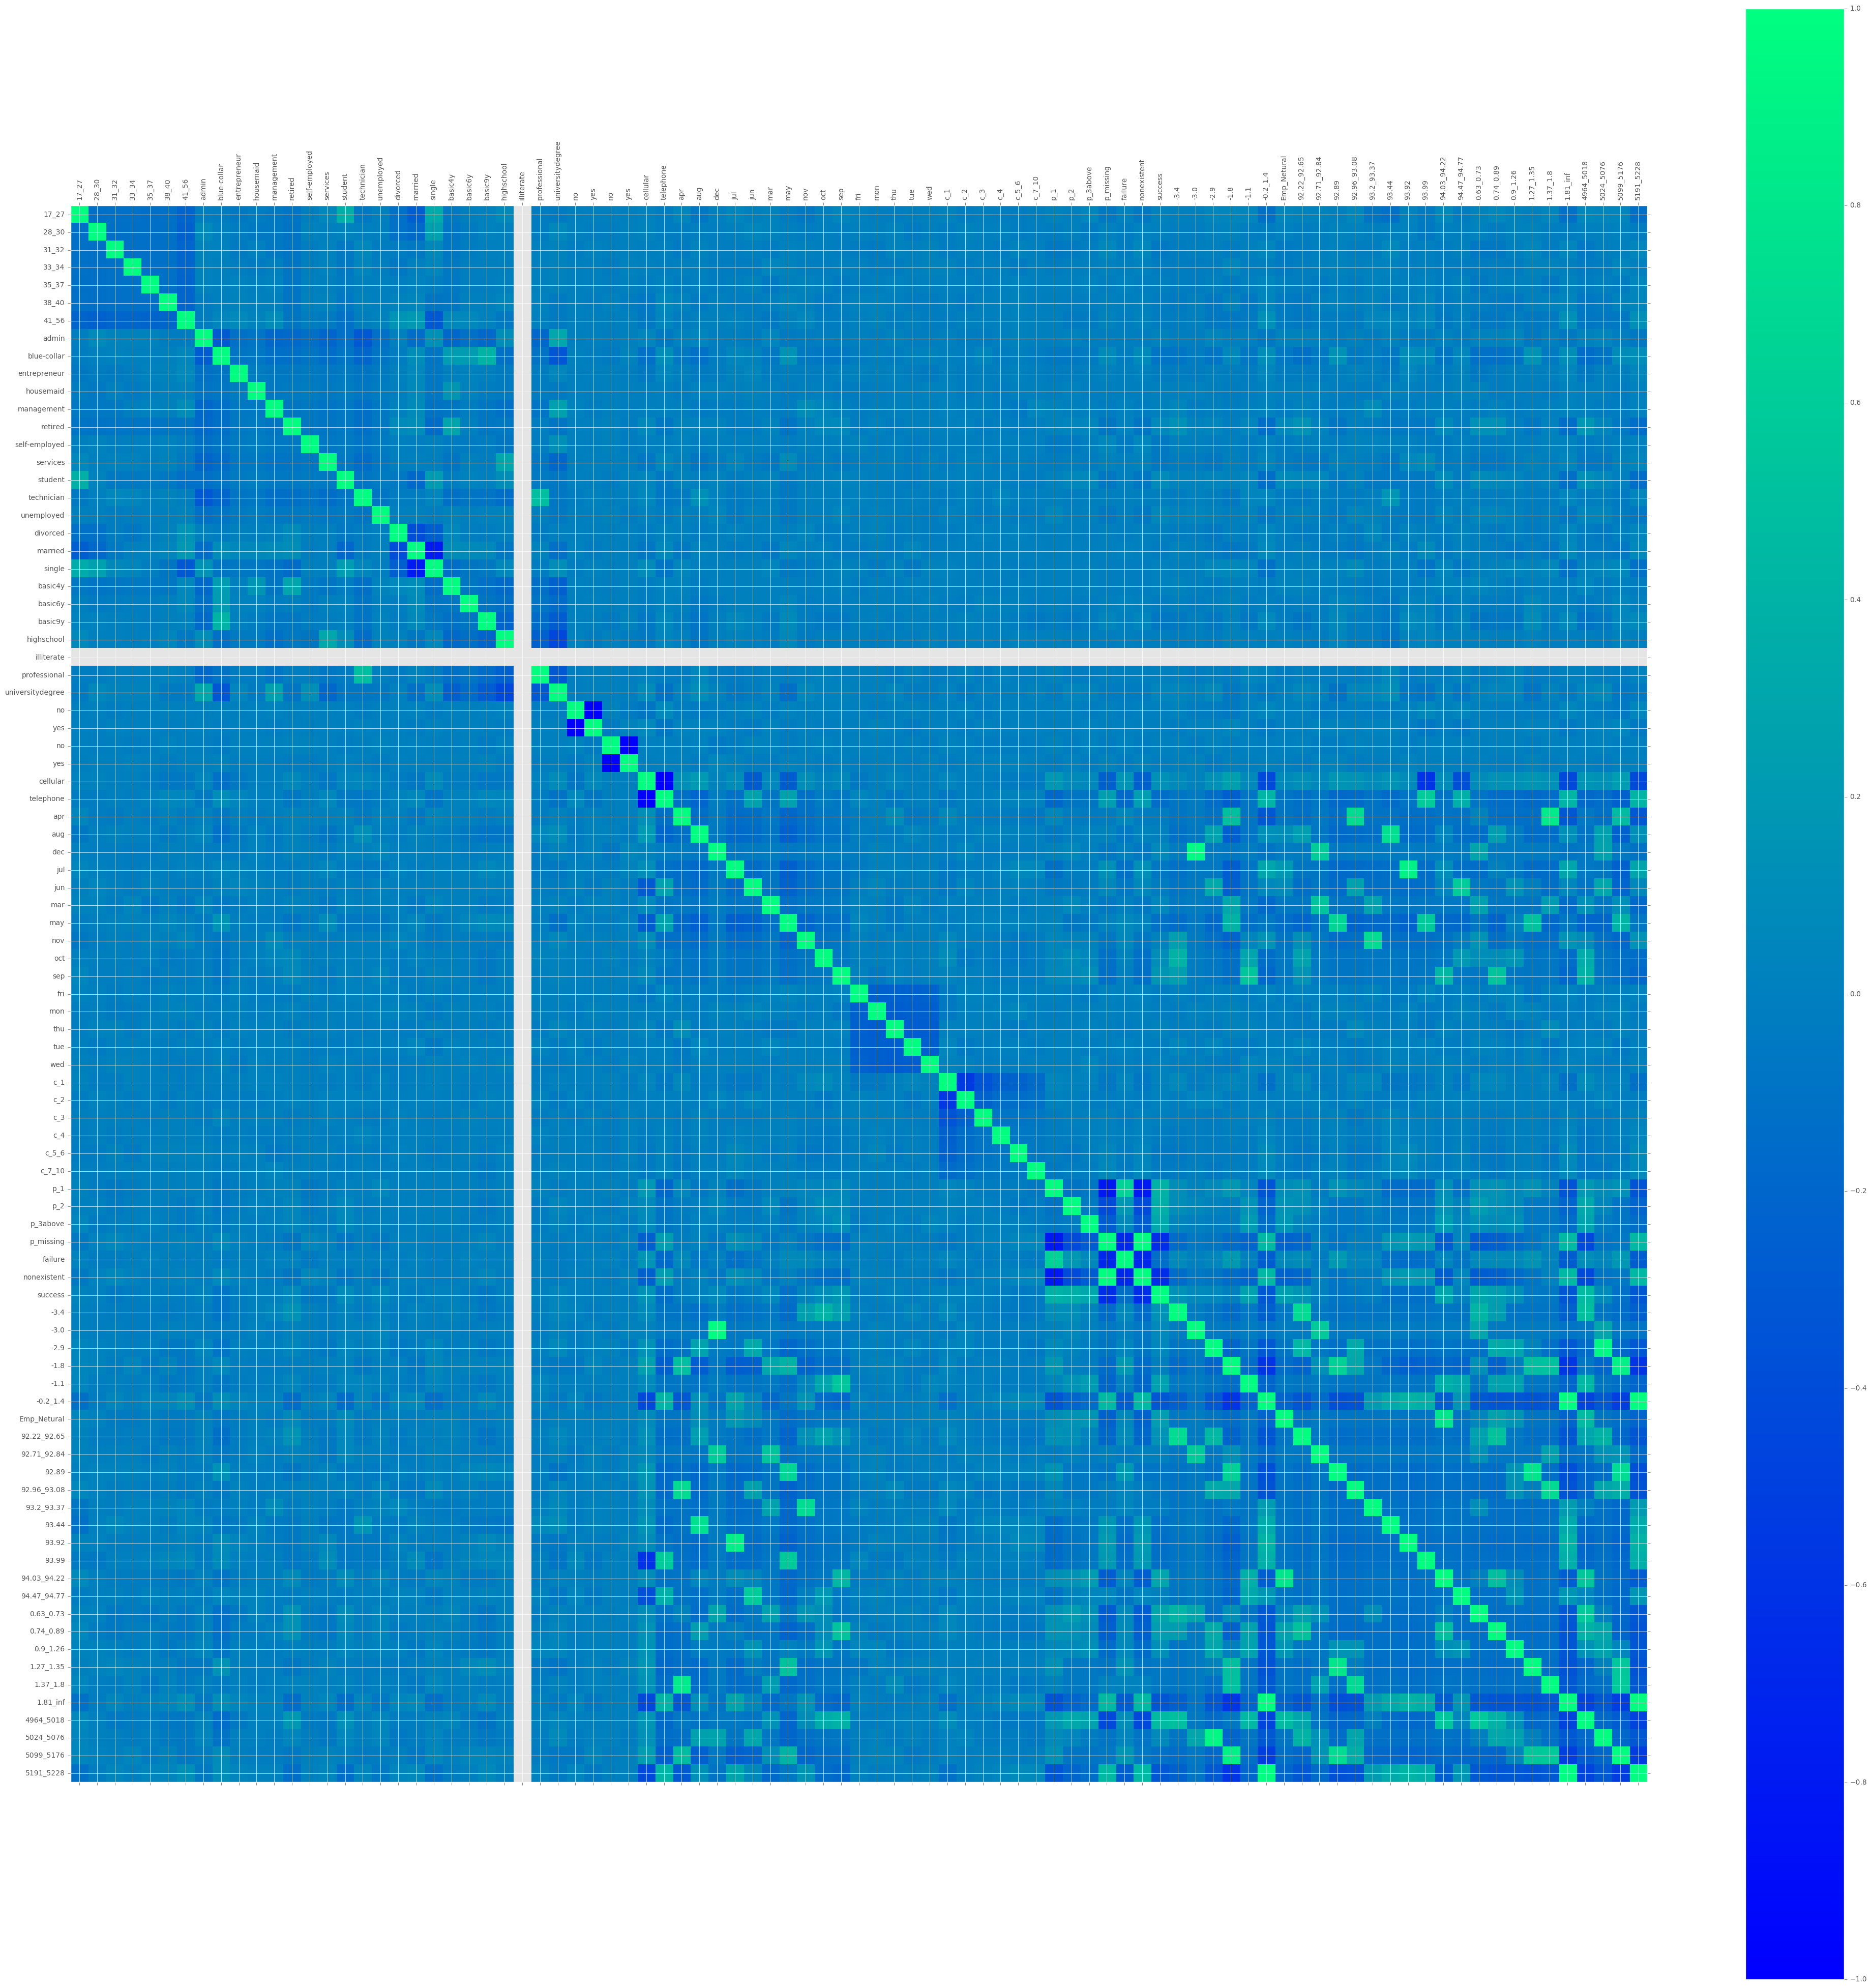

In [26]:
dummy_col = X_train.columns.values
cor= X_train.corr()
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax=1,cmap=plt.cm.winter)
fig.colorbar(cax)
ticks = np.arange(0,len(X_train.columns.values),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dummy_col,rotation='vertical')
ax.set_yticklabels(dummy_col)
plt.show()
# fig.savefig('corr.jpg',dpi=300)

In [25]:
dplist_m = [-3.0,
            'dec',
            'jul',
            '-0.2_1.4',
            '93.2_93.37',
            '1.81_inf',
            '5099_5176']

In [26]:
X_train.drop(dplist_m,1,inplace=True)
X_test.drop(dplist_m,1,inplace=True)

/Users/xunzha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/xunzha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [27]:
X_train.shape

(3859, 82)

OLS model.

we can use P-value to identify which attributes are important.

In [30]:
model = sm.OLS(y_train,X_train)
result = model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     25.45
Date:                Wed, 07 Dec 2016   Prob (F-statistic):          1.71e-252
Time:                        23:39:02   Log-Likelihood:                -2084.2
No. Observations:                3859   AIC:                             4304.
Df Residuals:                    3791   BIC:                             4730.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
17_27               -0.0393      0.041  

Choose the attributes which the P-values less than 0.7

In [28]:
dplist_p = ['entrepreneur',
           'management',
           'retired',
           'self-employed',
           'divorced',
           'single',
           'professional',
           'telephone',
           'mar',
           'nov',
           '-1.1',
           '93.44',
           '93.92',
           '94.47_94.77',
           '0.74_0.89',
           '5191_5228']

In [29]:
X_train.drop(dplist_p,1,inplace=True)
X_test.drop(dplist_p,1,inplace=True)

/Users/xunzha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/xunzha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
X_train.shape

(3859, 67)

### Step 3 : Train Model

We use three models.
- KNeighborsClassifier 
- DecisionTreeClassifier
- RandomForestClassifier.

In [31]:
clf0 = neighbors.KNeighborsClassifier()
clf1 = tree.DecisionTreeClassifier(random_state=1)
clf2 = RandomForestClassifier(max_depth=5,min_samples_split=2,n_estimators=100,random_state=1)

#### ROC Curve of three models

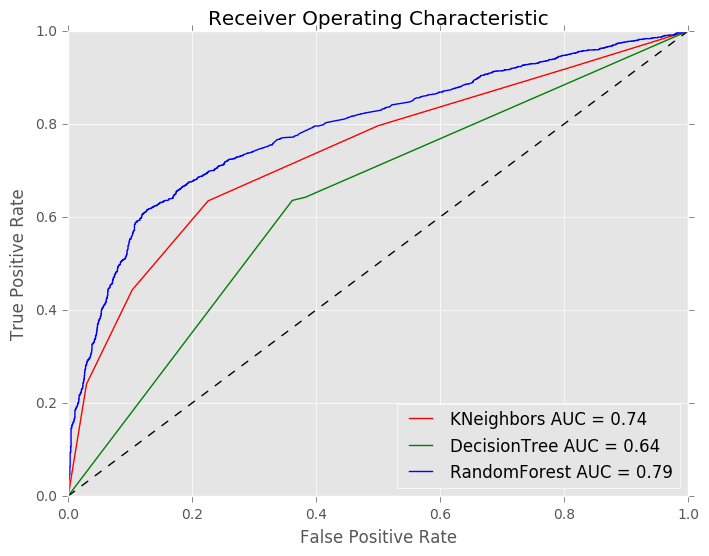

In [32]:
model_list = [clf0,clf1,clf2]
label=['KNeighbors','DecisionTree','RandomForest']
col = ['r','g','b']
fig = plt.figure(figsize=(8,6))
pointer=0
for i in model_list:
    i.fit(X_train,y_train)
    preds = i.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = (label[pointer]+' AUC = %0.2f' % roc_auc),color=col[pointer])
    pointer+=1
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Normalized confusion matrix

In [33]:
cm = [1,2,3]
pointer = 0
for i in model_list:
    predict = i.predict(X_test)
    print(classification_report(y_test, predict)) 
    cm[pointer]=confusion_matrix(y_test,predict)   
    print(cm[pointer])
    pointer+=1

             precision    recall  f1-score   support

          0       0.68      0.77      0.72      1927
          1       0.74      0.63      0.68      1932

avg / total       0.71      0.70      0.70      3859

[[1492  435]
 [ 706 1226]]
             precision    recall  f1-score   support

          0       0.64      0.64      0.64      1927
          1       0.64      0.64      0.64      1932

avg / total       0.64      0.64      0.64      3859

[[1230  697]
 [ 704 1228]]
             precision    recall  f1-score   support

          0       0.69      0.86      0.77      1927
          1       0.82      0.62      0.71      1932

avg / total       0.76      0.74      0.74      3859

[[1664  263]
 [ 732 1200]]


In [34]:
import itertools
np.set_printoptions(precision=2)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.77  0.23]
 [ 0.37  0.63]]


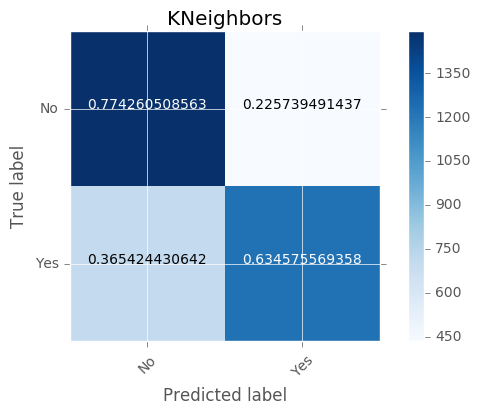

Normalized confusion matrix
[[ 0.64  0.36]
 [ 0.36  0.64]]


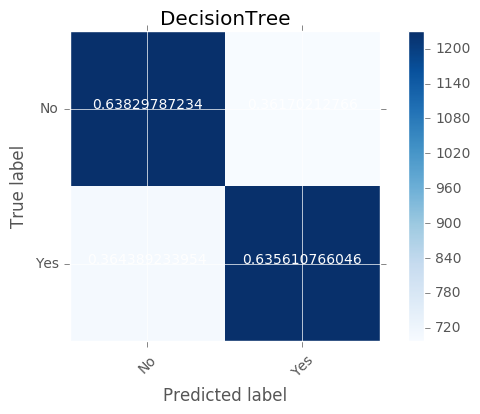

Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.38  0.62]]


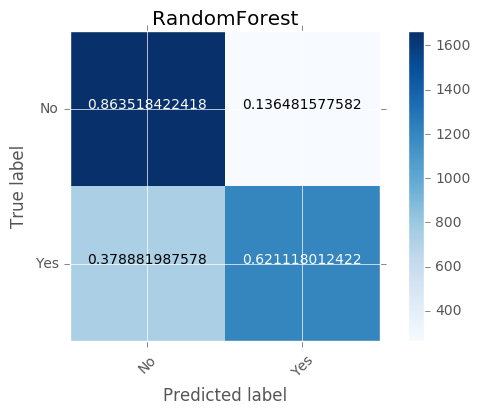

In [35]:
fig = plt.figure()
for i in range(3):
    plot_confusion_matrix(cm[i], classes=['No', 'Yes'], normalize=True, title=label[i])
    plt.show()

In [1]:
import sklearn.tree
import pydot_ng as pdot
dot_data = sklearn.tree.export_graphviz(clf1, out_file=None, feature_names = list(all_features), class_names=['no', 'yes'])
graph = pdot.graph_from_dot_data(dot_data)
graph.write_svg('mydt.svg')
graph.write_pdf('mydt.pdf')

ImportError: No module named 'pydot_ng'

In [36]:
X_train.columns.values

array(['17_27', '28_30', '31_32', '33_34', '35_37', '38_40', '41_56',
       'admin', 'blue-collar', 'housemaid', 'services', 'student',
       'technician', 'unemployed', 'married', 'basic4y', 'basic6y',
       'basic9y', 'highschool', 'illiterate', 'universitydegree', 'no',
       'yes', 'no', 'yes', 'cellular', 'apr', 'aug', 'jun', 'may', 'oct',
       'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'c_1', 'c_2', 'c_3',
       'c_4', 'c_5_6', 'c_7_10', 'p_1', 'p_2', 'p_3above', 'p_missing',
       'failure', 'nonexistent', 'success', -3.4, -2.9, -1.8, -1.1,
       'Emp_Netural', '92.22_92.65', '92.71_92.84', '92.89', '92.96_93.08',
       '93.99', '94.03_94.22', '0.63_0.73', '0.9_1.26', '1.27_1.35',
       '1.37_1.8', '4964_5018', '5024_5076'], dtype=object)

## Step 4: Improving model

As we can see from step 3, Random forest will give us much better results.

In [37]:
dfimpt=pd.DataFrame(clf2.feature_importances_.tolist(),index=X_train.columns.values)

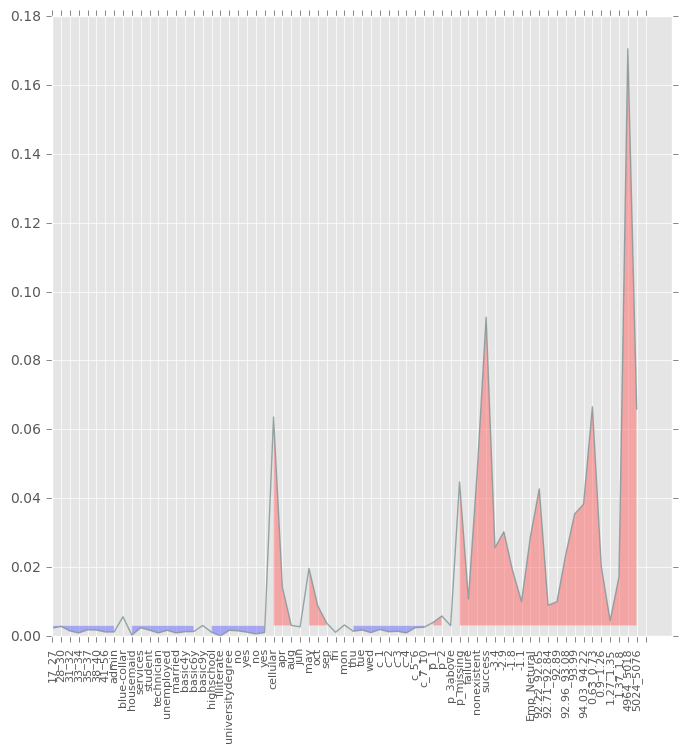

In [38]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(len(dfimpt.index)),dfimpt[0],color='#708789',alpha=.7,label='NO')
plt.fill_between(range(len(dfimpt.index)),0.003,dfimpt[0],where=(dfimpt[0] > 0.003), facecolor='#ff6666', alpha=0.5)
plt.fill_between(range(len(dfimpt.index)),0.003,dfimpt[0],where=(dfimpt[0] < 0.003), facecolor='#6666ff', alpha=0.5)
plt.xticks(range(len(dfimpt.index)+1), [y for y in dfimpt.index], rotation=90, fontsize=8)
plt.show()
# plt.savefig('important.png',dpi =300)

In [39]:
unimpor = dfimpt[0][dfimpt[0]<0.003]
unimpor.index

Index(['17_27', '28_30', '31_32', '33_34', '35_37', '38_40', '41_56', 'admin',
       'housemaid', 'services', 'student', 'technician', 'unemployed',
       'married', 'basic4y', 'basic6y', 'highschool', 'illiterate',
       'universitydegree', 'no', 'yes', 'no', 'yes', 'jun', 'fri', 'thu',
       'tue', 'wed', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5_6', 'c_7_10',
       'p_3above'],
      dtype='object')

In [40]:
X_train.drop(unimpor.index,1,inplace=True)
X_test.drop(unimpor.index,1,inplace=True)

/Users/xunzha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/xunzha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [41]:
X_train.shape

(3859, 32)

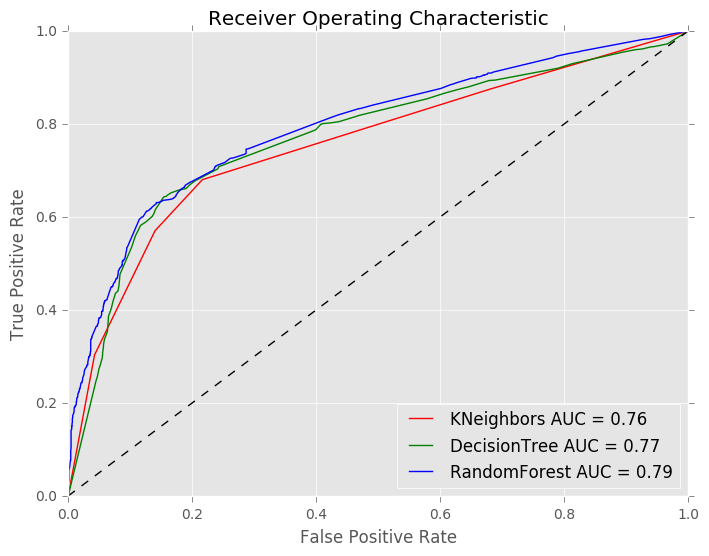

In [42]:
model_list = [clf0,clf1,clf2]
label=['KNeighbors','DecisionTree','RandomForest']
col = ['r','g','b']
fig = plt.figure(figsize=(8,6))
pointer=0
for i in model_list:
    i.fit(X_train,y_train)
    preds = i.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = (label[pointer]+' AUC = %0.2f' % roc_auc),color=col[pointer])
    pointer+=1
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
cm = [1,2,3]
pointer = 0
for i in model_list:
    predict = i.predict(X_test)
    print(classification_report(y_test, predict)) 
    cm[pointer]=confusion_matrix(y_test,predict)   
    print(cm[pointer])
    pointer+=1

             precision    recall  f1-score   support

          0       0.71      0.78      0.74      1927
          1       0.76      0.68      0.72      1932

avg / total       0.73      0.73      0.73      3859

[[1510  417]
 [ 618 1314]]
             precision    recall  f1-score   support

          0       0.70      0.85      0.77      1927
          1       0.81      0.63      0.71      1932

avg / total       0.75      0.74      0.74      3859

[[1646  281]
 [ 722 1210]]
             precision    recall  f1-score   support

          0       0.69      0.87      0.77      1927
          1       0.82      0.62      0.71      1932

avg / total       0.76      0.74      0.74      3859

[[1669  258]
 [ 737 1195]]


Normalized confusion matrix
[[ 0.78  0.22]
 [ 0.32  0.68]]


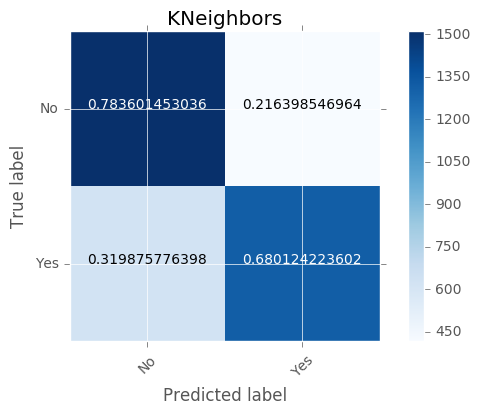

Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.37  0.63]]


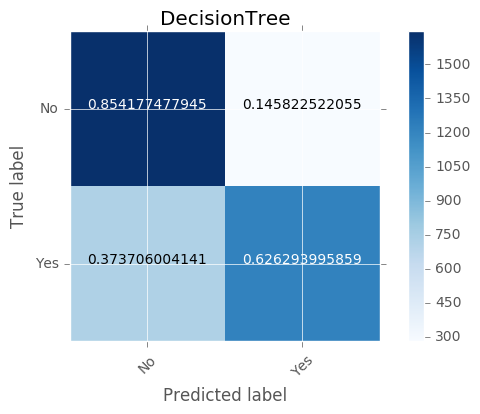

Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.38  0.62]]


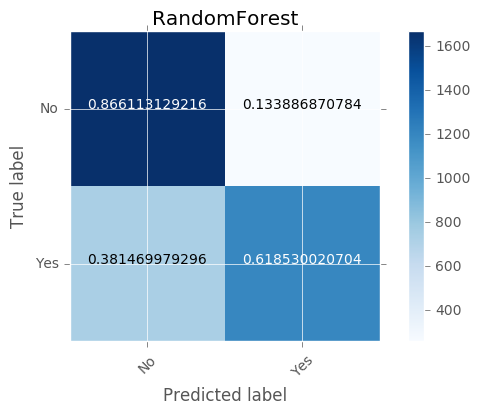

In [44]:
fig = plt.figure()
for i in range(3):
    plot_confusion_matrix(cm[i], classes=['No', 'Yes'], normalize=True, title=label[i])
    plt.show()